# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following link:
- [DDW-MU-Humanities Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EaonbI8dXvFHr5I75zUAhGEBXflfC4aZEqtcxPYHS5Jciw?e=s6UTbq)
- [DDW-MU-SocialStudies Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/ETaVN6doTnJElS0Egw34XYQB_VYCwijjNk_05Ft4RctYjg?e=X8iVbw)

There are two parts.
- Part 1 is related to predicting COVID-19 deaths
- Part 2 is open ended and you can find the problem of your interest as long as it is related to COVID-19. The only requirements are the following:
    - The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression. This means either you are working with continous numerical data or classification. You are not allowed to use Neural Networks or other Machine Learning models.
    - You must use Python and Jupyter Notebook

The following tasks are a general guide to help you do your project for Part 2:
1. Find an interesting problem which you can solve either using Linear Regression or Classification
1. Find a dataset to build your model. You can use [Kaggle](https://www.kaggle.com/datasets) to find your datasets.
1. Use plots to visualize and understand your data.
1. Create training and test data set.
1. Build your model
1. Use metrics to evaluate your model.
1. Improve your model

## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project.

## Rubrics

The rubrics for the scoring can be found in [this link](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EdLkuzyCrrJBp5QfVGtdHn8Bj3_epWiQMqv2mwyEei_3JQ?e=fLB0QN).

## Students Submission

Students' Names:
- Chua Min Pei  | 1005340 
- Sim Yu Hui, Kellie | 1004204
- Ryan Kaw Zheng Da | 1005144
- Eunice Kwok Xiu Yi | 1005469
- Ng Zhen An | 1005527 

SC02 Group 1

# Part 1

## 1.1 Introduction
For Task 1, we were tasked to build a Multiple Linear Regression model that predicts the number of deaths in various countries due to COVID-19.

After some research, we decided to use the data from the site [Our World in Data (OWID)](https://ourworldindata.org/coronavirus) since it updates information on a regular daily basis from various sources. It includes data that fall within the following metrics (as decided by OWID):

| Metrics | Source  | Updated | Countries |
|:-------:|:-----:|:---------:|:----------:|
| Vaccinations                | Official data collated by the Our World in Data team      | Daily   | 218       |
| Tests & positivity          | Official data collated by the Our World in Data team      | Weekly  | 139       |
| Hospital & ICU              | Official data collated by the Our World in Data team      | Weekly  | 38        |
| Confirmed cases             | JHU CSSE COVID-19 Data                                    | Daily   | 196        |
| Confirmed deaths            | JHU CSSE COVID-19 Data                                    | Daily   | 196       |
| Reproduction rate           | Arroyo-Marioli F, Bullano F, Kucinskas S, Rondón-Moreno C | Daily   | 185        |
| Policy responses            | Oxford COVID-19 Government Response Tracker               | Daily   | 186        |
| Other variables of interest | International organizations (UN, World Bank, OECD, IHME…) | Fixed   | 241       |

We will elaborate on the chosen predictor variables later in the report.

## 1.2 Import Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## 1.3 Import Dataset
To obtain the latest version of the dataset, the link to access the CSV file was obtained from the [README of OWID's repository](https://github.com/owid/covid-19-data/blob/master/public/data/README.md). The line currently commented out refers to the CSV file that was downloaded locally and later uploaded into our team member's personal GitHub repository.

In [92]:
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

fatal: destination path 't3-2d-ddw' already exists and is not an empty directory.


In [93]:
# Import dataset
file_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
# file_url = 't3-2d-ddw/task-1/data-241121.csv'
df = pd.read_csv(file_url)

In [94]:
df_first_world_countries = df[df['human_development_index'] >= 0.8]

features = ['total_cases', 'people_vaccinated_per_hundred', 'median_age', 'icu_patients']
target = ['total_deaths']
columns = ['date', 'iso_code'] + features + target

df_task_1 = df_first_world_countries.loc[:, columns]

df_task_1['date'] = pd.to_datetime(df['date'])  
mask = (df_task_1['date'] > '2021-1-1') & (df_task_1['date'] <= '2021-6-30')
df_task_1 = df_task_1.loc[mask]
df_task_1.dropna(inplace=True)

For Task 1, we decided to remove USA from the list of countries to predict on as the population size was significantly bigger for USA, meaning that it would disproportionately affect the accuracy of our model due to the high number of cases and deaths.

In [95]:
unique_codes = list(set(df_task_1['iso_code'].unique()) - set(["USA"]))

print("Number of Countries:", len(unique_codes))
print(unique_codes)

df_task_1 = df_task_1[df_task_1['iso_code'].isin(unique_codes)]

Number of Countries: 27
['SRB', 'PRT', 'SVK', 'EST', 'SVN', 'NLD', 'CHE', 'ITA', 'CZE', 'ESP', 'IRL', 'BEL', 'FIN', 'DEU', 'MLT', 'CYP', 'BGR', 'MYS', 'GBR', 'LUX', 'DNK', 'FRA', 'ROU', 'CAN', 'AUT', 'ISR', 'SWE']


In [96]:
df_task_1.to_csv("2d-task-1-v2.csv")

## 1.4 Multiple Linear Regression Model

### 1.4.1 Visualisation and Plots

For visualisation of the data, we made use of Matplotlib and Seaborn that were introduced to us in class and the [pre-class material](https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb). 

As the code for visualisation was repeated over the course of this report, we decided to insert them as functions for easy usage in the other cells. 

For any data that required preprocessing or further DataFrame analysis, we made use of codes from the cohort lessons and [pre-class material](https://github.com/Data-Driven-World/d2w_notes/blob/master/Working_With_Data.ipynb). 

In [97]:
def determine_correlation(df, column_name): 
  """Takes a DataFrame and a column name, return a DataFrame containing the correlation score between the column that matches the given name and all other columns."""
  pd.set_option('display.max_rows', None)
  correlations = df.corr()
  df_correlation = pd.DataFrame(correlations.loc[:, [column_name]])
  return df_correlation[[column_name]].sort_values(by=column_name, ascending=False)[1:]

def plot_correlation_heatmaps(df, figsize, annot=False):
  """Takes a DataFrame, the figsize of the heatmap to be plotted, and whether the heatmap should be annotated (default False), returns nothing."""
  correlations = df.corr()
  plt.figure(figsize=figsize)
  sns.heatmap(correlations, cmap="coolwarm", annot=annot)
  plt.show()

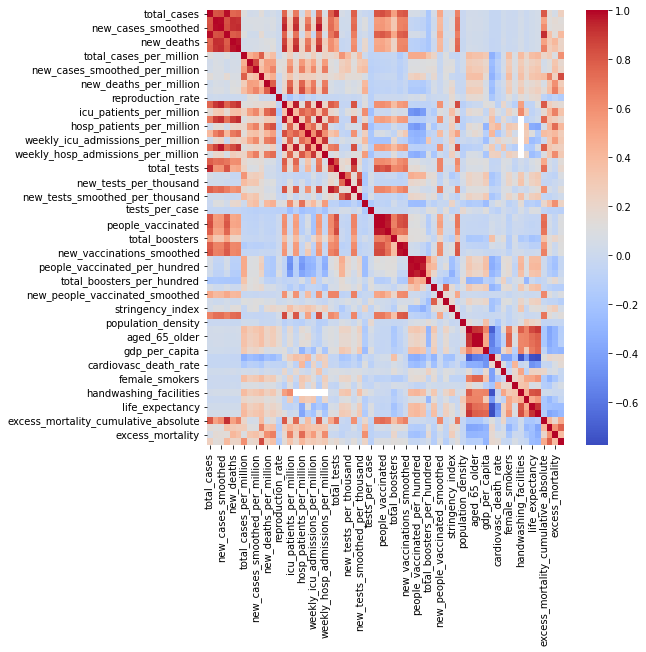

,total_deaths
total_cases,0.985001
excess_mortality_cumulative_absolute,0.924791
new_cases_smoothed,0.833336
new_cases,0.820425
total_tests,0.816577
new_deaths_smoothed,0.807415
people_vaccinated,0.801580
new_vaccinations_smoothed,0.792568
new_deaths,0.785400
total_vaccinations,0.777244


In [98]:
df_correlation = determine_correlation(df, "total_deaths")
plot_correlation_heatmaps(df, figsize=(8,8), annot=False)
df_correlation

Based on our analysis above, we narrowed down to 4 different predictor variables to be used for our Multiple Linear Regression model. We observed that the main 3 categories that have a higher correlation with total deaths are number of cases, vaccinations and number of ICU patients. Thus, these 3 categories of variables were used in our model as predictor variables. 

As datasets from different countries were used to train our model, we believe that the background of the countries should also be taken into consideration. Thus, the median age of the population was also selected to be part of our predictor variables.

In this model, we would like to use these features to test and see how they come together to affect the total death. 

The predictor variables, the relevant descriptions, and metrics (mentioned in Section 1.1 above) can be seen in the table below.

**Predictor Variables $(X)$**

Variable | Description | Metrics (from OWID)
:------------------ | :------------------|:-----------------
total_cases | Total confirmed cases of COVID-19 | Confirmed cases
people_vaccinated_per_hundred      | Total number of people who received at least one vaccine dose per 100 people in the total population | Vaccinations
icu_patients | Number of COVID-19 patients in intensive care units (ICUs) on a given day | Hospital & ICU 
median_age | Median age of the population, UN projection for 2020 | Others

**Predicted Variable $(y)$**

Variable | Description | Category
:------------------ | :------------------|:-----------------
total_deaths | Total deaths attributed to COVID-19 | Confirmed deaths

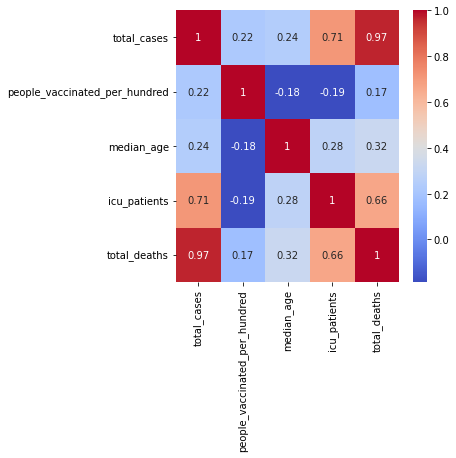

In [99]:
features = ['total_cases', 'people_vaccinated_per_hundred', 'median_age', 'icu_patients']
target = ['total_deaths']
columns = features + target

df_task_1 = df_task_1[columns]
plot_correlation_heatmaps(df_task_1, figsize=(5,5), annot=True)

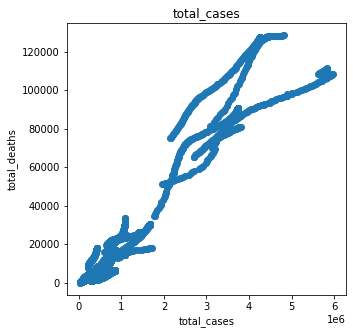

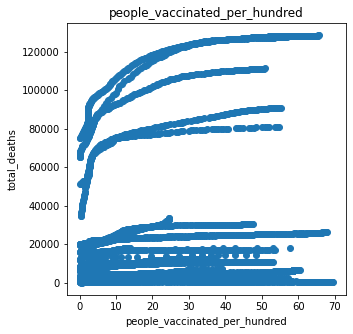

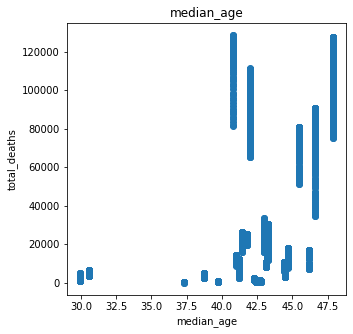

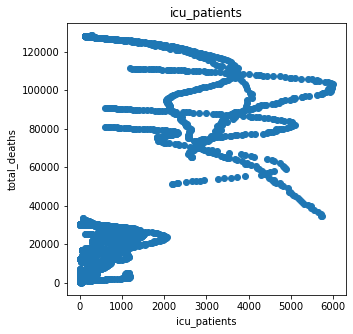

In [100]:
# Plotting all X variables (total_cases, people_vaccinated_per_hundred, 
# median_age, icu_patients) against y (total_deaths)

for col in features:
  plt.figure(figsize=(5,5))
  plt.xlabel(col)
  plt.ylabel("total_deaths")
  plt.title(col)
  plt.scatter(df_task_1[col], df_task_1["total_deaths"])
  plt.show() 

### 1.4.2 Helper Functions and Code for Model
In this section, we defined functions that were utilised in the model, taken from the cohort lessons and [pre-class material](https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb).

In [101]:
def normalize_z(df):
  """Takes a DataFrame, returns a DataFrame with normalized values using z-score normalization."""
  dfout = (df - df.mean(axis=0)) / df.std(axis=0)
  return dfout

def normalize_minmax(df):
  """Takes a DataFrame, returns a DataFrame with normalized values using min-max normalization."""
  dfout = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
  return dfout

def transform_features(df_feature, colname, colname_transformed):
  """Takes a DataFrame, the name of a column to be transformed, and the name for the transformed column, returns a DataFrame with an additional column for the transformed data."""
  df_feature[colname_transformed] = df[colname].apply(lambda x: x**2)
  return df_feature

def get_features_targets(df, feature_names, target_names):
  """Takes a DataFrame, a list of columns for the features, and a list of columns for the target, returns a DataFrame containing the features and a DataFrame containing the target."""
  df_feature = df.loc[:, feature_names]
  df_target = df.loc[:, target_names]
  return df_feature, df_target

def prepare_feature(df_feature):
  """Takes a DataFrame containing the features, convert it into a numpy array, change it to a column vector, and add a column of '1's in the first column, returns a numpy.array containing the features."""
  cols = len(df_feature.columns)
  np_feature = df_feature.to_numpy().reshape(-1, cols)
  constants = np.ones(shape=(np_feature.shape[0], 1))
  return np.concatenate((constants, np_feature), axis=1)

def prepare_target(df_target):
  """Takes a DataFrame containing the target, convert it into a numpy array, change it to a column vector, returns a Numpy array containing the target."""
  cols = len(df_target.columns)
  np_target = df_target.to_numpy().reshape(-1, cols)
  return np_target

def predict(df_feature, beta):
  """Takes a DataFrame and an array of beta values, returns the predicted y values after z-normalization and conversion to a Numpy array."""
  df_feature = normalize_z(df_feature)
  np_X = prepare_feature(df_feature)
  return predict_norm(np_X, beta)

def predict_norm(X, beta):
  """Takes a Numpy array and an array of beta values, returns the straight line equation after standardization and adding of column for constant 1."""
  y_pred = np.matmul(X, beta)
  return y_pred
    
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
  """Takes a DataFrame containing the features, a DataFrame containing the target, the seed used to split randomly, and the fraction used to split randomly (default 0.5), returns a tuple of 4 DataFrames containing the train and test sets for the features and target DataFrames."""
  # indexes = which is the number of rows
  indexes = df_feature.index
  if random_state != None:
      np.random.seed(random_state)

  # k = length / size of the test array
  k = int(test_size * len(indexes))

  test_index = np.random.choice(indexes, k, replace=False)
  train_index = list(set(indexes) - set(test_index))

  df_feature_train = df_feature.loc[train_index, :]
  df_feature_test = df_feature.loc[test_index, :]
  df_target_train = df_target.loc[train_index, :]
  df_target_test = df_target.loc[test_index, :]

  return df_feature_train, df_feature_test, df_target_train, df_target_test

In [102]:
def compute_cost(X, y, beta):
  """Takes a Numpy array containing the features, a Numpy array containing the target, and beta coefficients at the end of the iteration, returns an array of computed cost function values."""
  J = 0
  m = X.shape[0]
  error = np.matmul(X, beta) - y
  error_sq = np.matmul(error.T, error)
  J = (1/(2*m))*error_sq
  J = J[0][0]
  return J


def gradient_descent(X, y, beta, alpha, num_iters):
  """Takes a Numpy array containing the features, a Numpy array containing the target, an array of beta values, the learning rate, the number of iterations to perform, returns the beta coefficient at the end of the iteration, and an array storing the cost value at each iteration."""
  m = X.shape[0]
  J_storage = np.zeros((num_iters,1))
  for n in range(num_iters):
    deriv = np.matmul(X.T, (np.matmul(X, beta)-y))
    beta = beta - alpha * (1/m) * deriv
    J_storage[n] = compute_cost(X, y, beta)
  return beta, J_storage

In [103]:
def multiple_linear_regression(df_features, df_target):
  # Normalize the features using z normalization
  df_features = normalize_z(df_features)

  # Change the features and the target to numpy array using the prepare functions
  X = prepare_feature(df_features)
  target = prepare_target(df_target)

  iterations = 20000
  alpha = 0.1
  beta = np.zeros((X.shape[1], 1))

  # Call the gradient_descent function
  beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
  
  # Call the predict() method
  pred = predict(df_features, beta)

  # Plotting figures for visualisation
  # plt.figure()
  # plt.title("J_storage")
  # plt.plot(J_storage)
  for column in df_features.columns:
    plt.figure()
    plt.xlabel(column)
    plt.ylabel("total_deaths")
    plt.scatter(df_features[column], target, color='orange')
    plt.scatter(df_features[column], pred, color='blue')
    plt.show()

  # Calculate R^2, Adjusted R^2
  print("R^2 Score: ", r2_score(target, pred))
  print("Adjusted R^2 Score: ", adjusted_r2_score(r2_score(target, pred), X.shape[0], X.shape[1]))
  return beta

### 1.4.3 Finding the Best Model
In order to find the best model for multiple linear regression, we experimented with all 15 combinations of the 4 features. For our data, X1, X2, X3, X4 would give us the 15 combinations below:

1 feature | 2 features | 3 features | 4 features
:------: | :------: | :------: | :------:
X1 | X1 + X2 | X1 + X2 + X3 | X1 + X2 + X3 + X4
X2 | X2 + X3 | X2 + X3 + X4 | 
X3 | X3 + X4 | X3 + X4 + X1 | 
X4 | X4 + X1 | X4 + X1 + X2 | 
  | X2 + X4 |
 | X1 + X3 

This was done using Excel's Analysis Toolpak and later validated using Python codes. The results for this can be found in this section.

#### 1.4.3.1 Accuracy Metrics
As mentioned in the task brief, R<sup>2</sup> is not a good metric to be used for Multiple Linear Regression. As such, we decided to take into account the metric Adjusted R<sup>2</sup>, which will show us if the variables used were potentially overfitting our model.

The Adjusted R<sup>2</sup> Score is an improved version of R<sup>2</sup> score that penalizes us for adding an independent variable that does not help in predicting the dependent variable [1] [2]. By taking into account the number of independent variables used for predicting the target variable, we can determine whether adding new variables to the model actually increases the model fit [2]. 

Sources:
1. https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
2. https://www.analyticsvidhya.com/blog/2020/07/difference-between-r-squared-and-adjusted-r-squared/

In [104]:
def r2_score(target, pred):
  """Takes a Numpy array containing the target and a Numpy array containing the predicted values, returns the r2 score."""
  diff = target - pred
  ssres = np.matmul(diff.T,diff)[0][0]
  target_mean = np.mean(target)
  diff_mean = target - target_mean
  sstot = np.matmul(diff_mean.T, diff_mean)[0][0]
  return 1 - (ssres/sstot)
  
def adjusted_r2_score(r2, n, k):
  """Takes the R^2 score, number of data points, and number of features, returns the adjusted r2 score."""
  num = (1 - r2) * (n - 1)
  den = n - k - 1
  return 1 - num/den

#### 1.4.3.2 P-Value
In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct [1]. In other words, a p-value is a measure of the probability that an observed difference could have occurred just by random chance [1]. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis (which proposes that there is no difference between certain characteristics of a population [2]) would be rejected [1]. 

The level of statistical significance is often expressed as a p-value between 0 and 1 [3]. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. A p-value less than 0.05 (typically ≤ 0.05) is statistically significant [3].

In our Excel, we obtained p-values for each of our models, which was later used as a method of deciding whether the feature should be used. 

Sources:
1. https://www.investopedia.com/terms/p/p-value.asp
2. https://www.investopedia.com/terms/n/null_hypothesis.asp
3. https://www.simplypsychology.org/p-value.html


#### 1.4.3.3 Assumptions
For this report, given that we used the total cases, number of people vaccinated, median age and ICU patients to predict the total_deaths, we had to make the assumption that all the variables were independent of each other. 

However, in real life, we note that such an ideal situation may not occur. In actuality, the total number of cases in a country could be dependent on the number of people vaccinated or ICU patients and hence it may not be as linear as we expect it to be for the sake of this report.

#### 1.4.3.4 Comparison with Multiple Linear Regression with Python
The Linear Regression models were also similarly implemented using Python.  Adjusted R<sup>2</sup> was used as a metric to determine if the Excel was on the right track.

In [105]:
# Obtaining all 15 combinations of our 4 features
feature_combis = []
for x in range(1, len(features)+1):
    for subset in itertools.combinations(features, x):
      feature_combis.append(subset)

Feature(s) Used:  ('total_cases',)


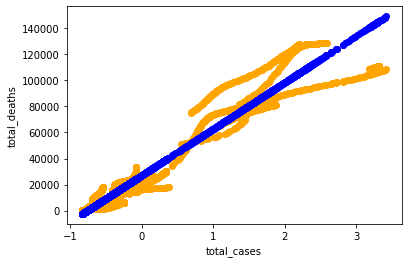

R^2 Score:  0.935710431431667
Adjusted R^2 Score:  0.9356786678108329
Beta Coefficient Values:  [[27166.65169094]
 [35596.38213657]]


Feature(s) Used:  ('people_vaccinated_per_hundred',)


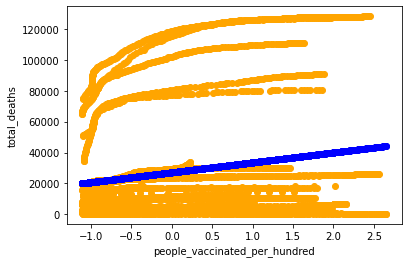

R^2 Score:  0.030613911953687234
Adjusted R^2 Score:  0.030134966258012152
Beta Coefficient Values:  [[27166.65169094]
 [ 6438.64587017]]


Feature(s) Used:  ('median_age',)


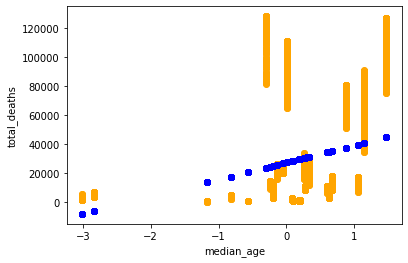

R^2 Score:  0.10348115070561614
Adjusted R^2 Score:  0.10303820661011498
Beta Coefficient Values:  [[27166.65169094]
 [11837.65693348]]


Feature(s) Used:  ('icu_patients',)


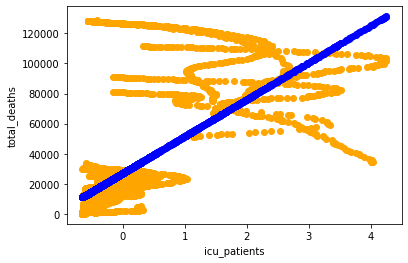

R^2 Score:  0.44173880542200106
Adjusted R^2 Score:  0.4414629846736918
Beta Coefficient Values:  [[27166.65169094]
 [24457.82881978]]


Feature(s) Used:  ('total_cases', 'people_vaccinated_per_hundred')


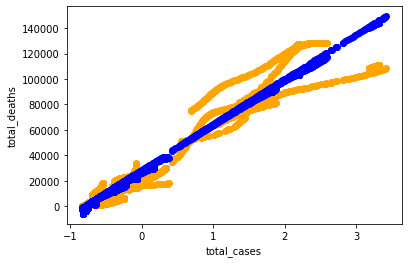

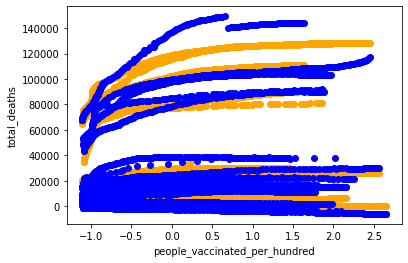

R^2 Score:  0.9370133659558506
Adjusted R^2 Score:  0.9369666746037052
Beta Coefficient Values:  [[27166.65169094]
 [35892.0923096 ]
 [-1360.81865527]]


Feature(s) Used:  ('total_cases', 'median_age')


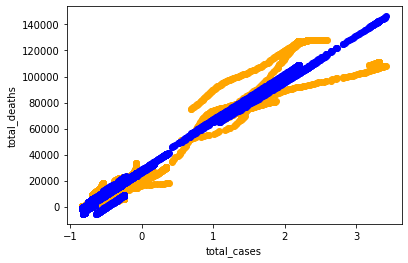

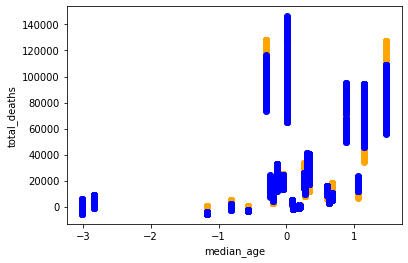

R^2 Score:  0.9441351025144288
Adjusted R^2 Score:  0.9440936904332682
Beta Coefficient Values:  [[27166.65169094]
 [34759.68711611]
 [ 3479.71524753]]


Feature(s) Used:  ('total_cases', 'icu_patients')


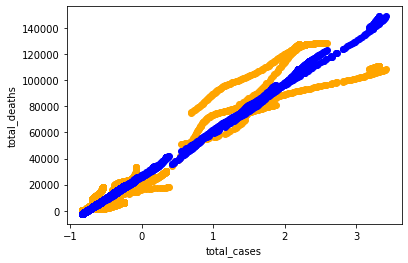

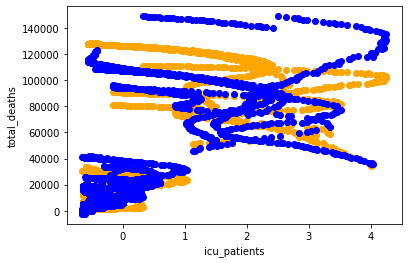

R^2 Score:  0.9367770623540452
Adjusted R^2 Score:  0.9367301958324397
Beta Coefficient Values:  [[27166.65169094]
 [36810.98352259]
 [-1708.69726686]]


Feature(s) Used:  ('people_vaccinated_per_hundred', 'median_age')


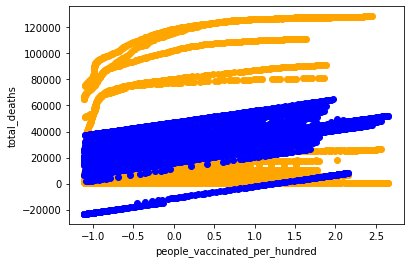

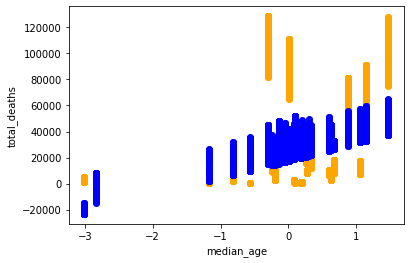

R^2 Score:  0.1603137469250432
Adjusted R^2 Score:  0.15969129603321597
Beta Coefficient Values:  [[27166.65169094]
 [ 8925.87390186]
 [13484.0921234 ]]


Feature(s) Used:  ('people_vaccinated_per_hundred', 'icu_patients')


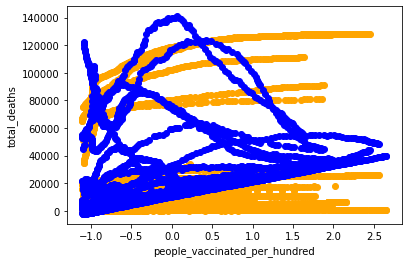

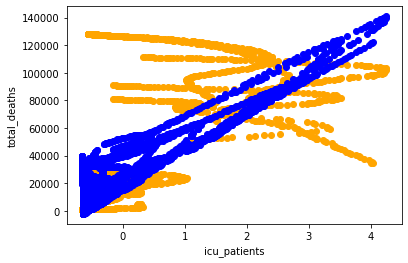

R^2 Score:  0.534129885639375
Adjusted R^2 Score:  0.533784540854823
Beta Coefficient Values:  [[27166.65169094]
 [11384.21476983]
 [26576.31020694]]


Feature(s) Used:  ('median_age', 'icu_patients')


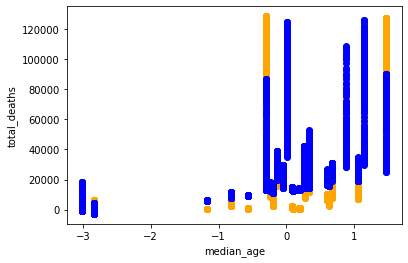

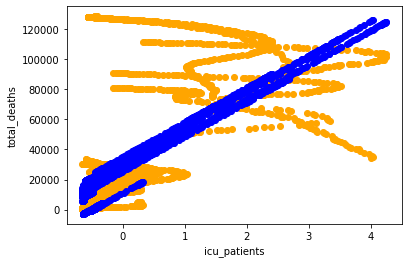

R^2 Score:  0.46149506582043454
Adjusted R^2 Score:  0.4610958775816061
Beta Coefficient Values:  [[27166.65169094]
 [ 5389.5766109 ]
 [22943.10708842]]


Feature(s) Used:  ('total_cases', 'people_vaccinated_per_hundred', 'median_age')


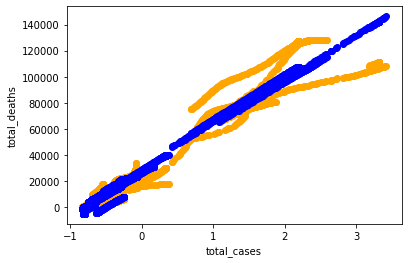

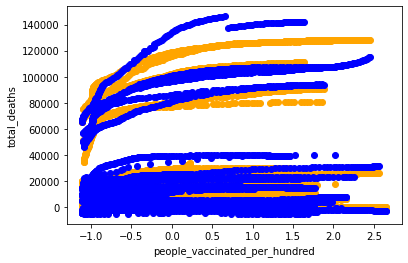

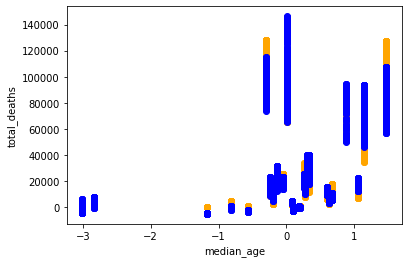

R^2 Score:  0.9443199623903851
Adjusted R^2 Score:  0.9442649153932426
Beta Coefficient Values:  [[27166.65169094]
 [34906.69793814]
 [ -529.36486602]
 [ 3346.72182702]]


Feature(s) Used:  ('total_cases', 'people_vaccinated_per_hundred', 'icu_patients')


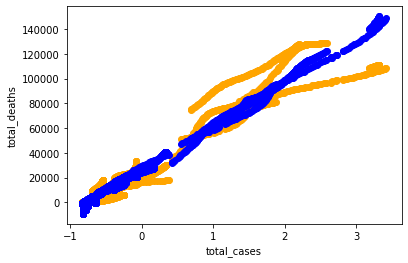

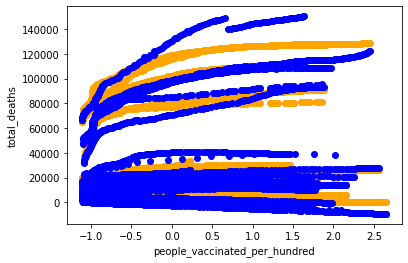

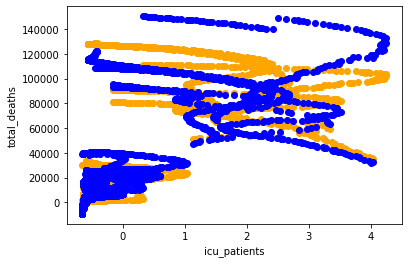

R^2 Score:  0.9404045368184565
Adjusted R^2 Score:  0.9403456189112083
Beta Coefficient Values:  [[27166.65169094]
 [38658.82986792]
 [-2614.99607721]
 [-3508.83363267]]


Feature(s) Used:  ('total_cases', 'median_age', 'icu_patients')


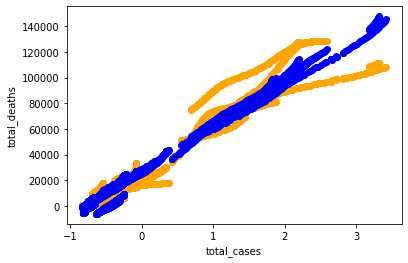

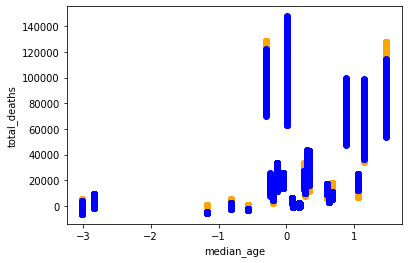

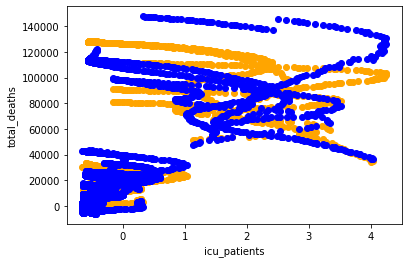

R^2 Score:  0.9464482014107781
Adjusted R^2 Score:  0.9463952584561669
Beta Coefficient Values:  [[27166.65169094]
 [36500.4070933 ]
 [ 3777.72965452]
 [-2549.64650923]]


Feature(s) Used:  ('people_vaccinated_per_hundred', 'median_age', 'icu_patients')


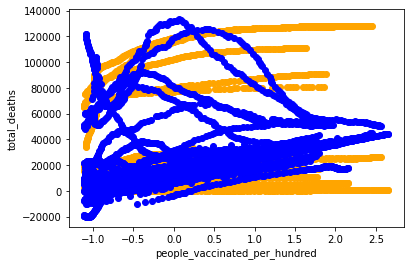

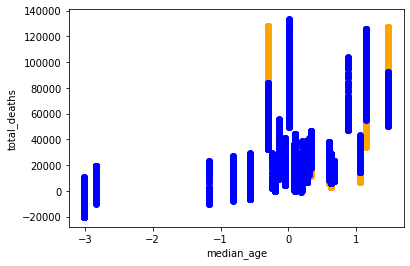

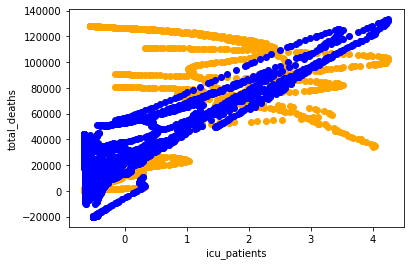

R^2 Score:  0.5683490715671139
Adjusted R^2 Score:  0.5679223281875461
Beta Coefficient Values:  [[27166.65169094]
 [12364.92373893]
 [ 7163.82710585]
 [24745.44107178]]


Feature(s) Used:  ('total_cases', 'people_vaccinated_per_hundred', 'median_age', 'icu_patients')


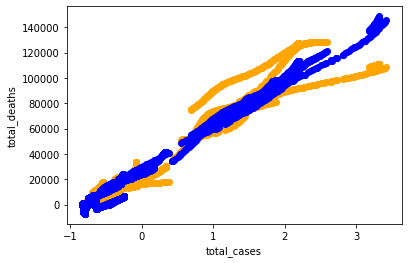

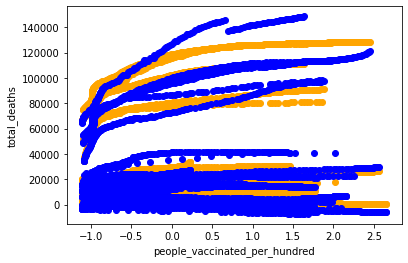

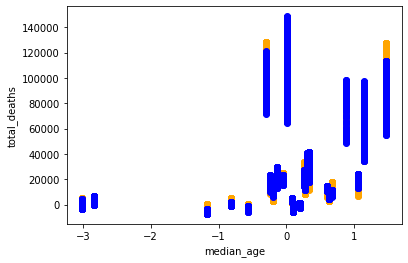

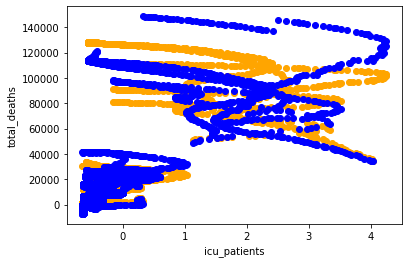

R^2 Score:  0.9481758023708868
Adjusted R^2 Score:  0.9481117427940894
Beta Coefficient Values:  [[27166.65169094]
 [37827.96947513]
 [-1841.15436338]
 [ 3454.91653116]
 [-3745.21773351]]




In [106]:
# Running Multiple Linear Regression on each combination of features
for combi in feature_combis:
  print("Feature(s) Used: ", combi)
  df_features, df_target = get_features_targets(df_task_1, combi, target)
  beta = multiple_linear_regression(df_features, df_target)
  print("Beta Coefficient Values: ", beta)
  print("\n")

Features | Excel | Python
:------ | :------ | :------
Total Cases | 0.935617957333392 | 0.9356786678108329
People Vaccinated Per Hundred | 0.0284892944313471 | 0.030134966258012486
Median Age | 0.101777147806489 | 0.10303820661011531
ICU Patients | 0.437311576454327 | 0.44146298467369194
Total Cases + People Vaccinated Per Hundred | 0.937011788047751 | 0.9369666746037052
Total Cases + Median Age | 0.94402362989154 | 0.9440936904332682
Total Cases + ICU Patients | 0.936810914732299 | 0.9367301958324397
People Vaccinated Per Hundred + Median Age | 0.156397137118895 | 0.1596912960332163
People Vaccinated Per Hundred + ICU Patients | 0.528784820283488 | 0.5337845408548232
Median Age + ICU Patients | 0.456858670728682 | 0.4610958775816063
Total Cases + People Vaccinated Per Hundred + Median Age | 0.94422952270268 | 0.9442649153932426
Total Cases + People Vaccinated Per Hundred + ICU Patients | 0.946521938647434 | 0.9403456189112084
Total Cases + Median Age + ICU Patients | 0.940815740156368 | 0.9463952584561669
People Vaccinated Per Hundred + Median Age + ICU Patients | 0.563373545710692 | 0.5679223281875463
Total Cases + People Vaccinated Per Hundred + Median Age + ICU Patients | 0.9484801837915 | 0.9481117427940894



As can be seen above, the Adjusted R<sup>2</sup> values for Excel and Python are quite similar to each other, and the same for 3 significant figures minimally. This goes to show that our model is very accurate.

Upon further analysis, we note that the best Adjusted R<sup>2</sup>value comes from the last regression model with all 4 features being implemented. As such, we decided to isolate it and compare the beta coefficient values.

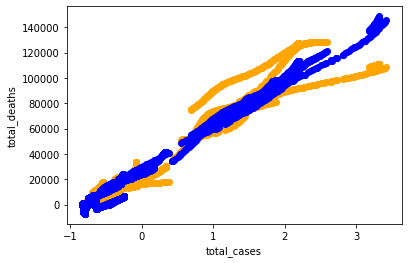

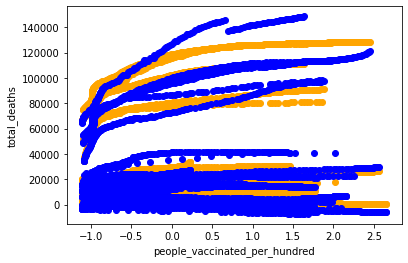

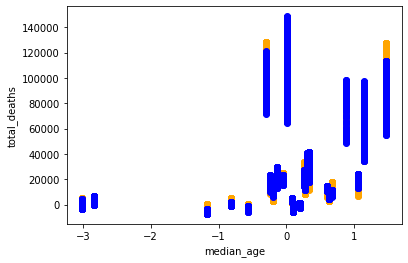

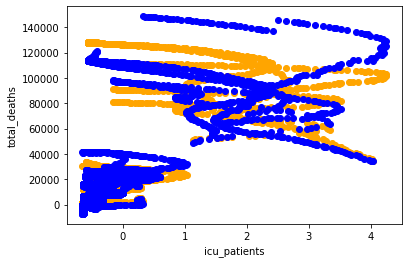

R^2 Score:  0.9481758023708868
Adjusted R^2 Score:  0.9481117427940894
[[27166.65169094]
 [37827.96947513]
 [-1841.15436338]
 [ 3454.91653116]
 [-3745.21773351]]


In [107]:
df_features, df_target = get_features_targets(df_task_1, feature_combis[-1], target)
beta = multiple_linear_regression(df_features, df_target)
print(beta)

Analysing the beta coefficient values, we note that the values are quite different from that of Excel. We hypothesise that this is due to the fact that we performed Z-normalization on our features before running the Multiple Linear Regression Model in Python. Normalization is generally required when we are dealing with attributes on a different scale, otherwise, it may lead to a dilution in effectiveness of an important equally important attribute (on lower scale) because of other attribute having values on larger scale [1]. 

Z-normalization was used in our code to scale the data of an attribute so that it falls in a smaller range ($\pm$3 standard deviations). As a result, the beta coefficients will be greater in the Python code as compared to the one in Excel as the actual data was scaled down in Python.

Coefficient | Excel | Python
:------ | :------ | :------
Intercept (C / $\beta_0$) | -35569.2134759228 | 27166.65169094
$\beta_1$ | 0.0270689864149344 | 337827.96947513
$\beta_2$  | -107.232691163685 | -1841.15436338
$\beta_3$ | 850.951553552295 | 3454.91653116
$\beta_4$ | -3.21689543088435 | -3745.21773351

As a proof of concept, given the beta coefficient values above, we decided to plot the graphs using the equation $Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4$ in both Excel and Python. 

Sources:
1. https://www.geeksforgeeks.org/data-normalization-in-data-mining/

For the sake of brevity and simplicity, we have only plotted the graphs for the variable $X_1$, representing the total cases. This is due to the fact that it had the highest Adjusted R<sup>2</sup> value amongst all single variables when we ran the Multiple Linear Regression analysis earlier. We hence deduced that it was the main factor affecting our model, and decided to plot the graph for this variable against the total deaths (actual dataset vs predicted).

The graphs below have different values on the x-axis because of Z-normalization as mentioned above (normalized for Python but not for Excel).

Graph plotted using Excel:

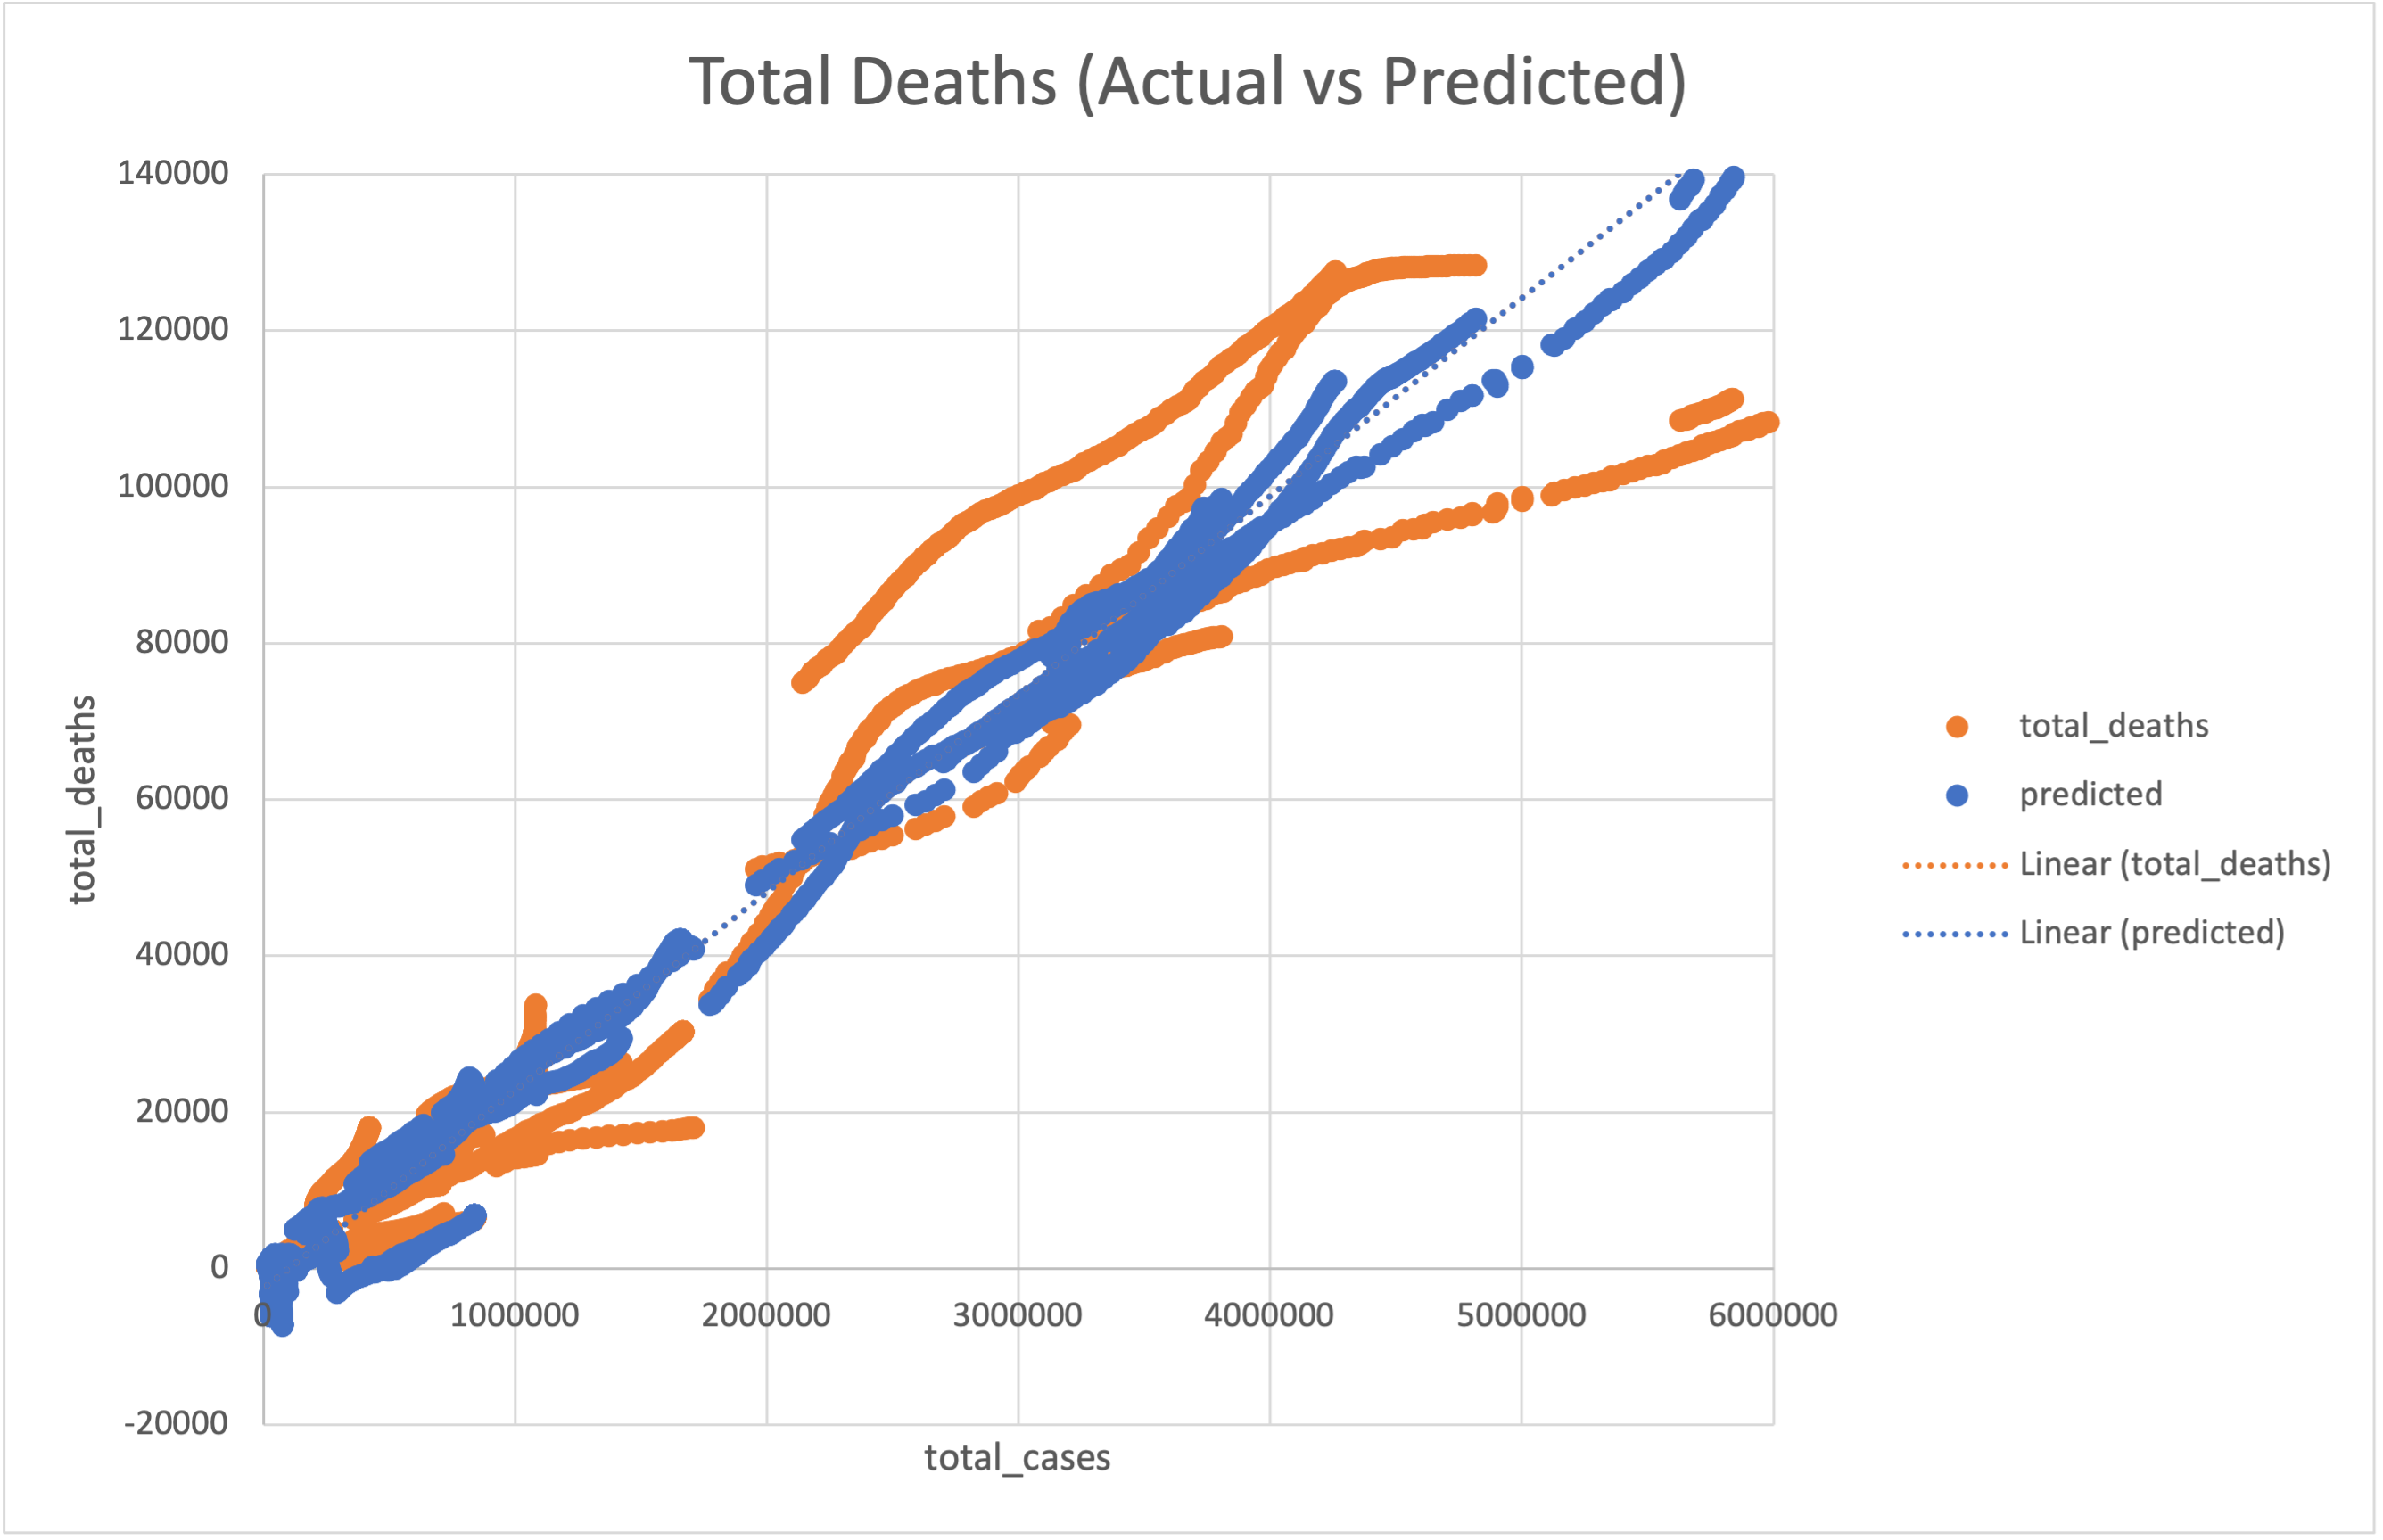

Graph plotted using Python:

In [108]:
df_features = normalize_z(df_features)
feature = prepare_feature(df_features)
ytrue = prepare_target(df_target)
pred = beta[0] + beta[1] * df_features['total_cases'] + beta[2] * df_features['people_vaccinated_per_hundred'] + beta[3] * df_features['median_age'] + beta[4] * df_features['icu_patients']

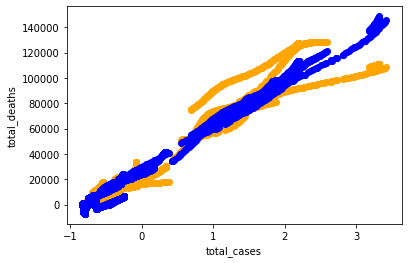

In [109]:
plt.figure()
plt.xlabel('total_cases')
plt.ylabel("total_deaths")
plt.scatter(df_features['total_cases'], ytrue, color='orange')
plt.scatter(df_features['total_cases'], pred, color='blue')
plt.show()



---



# Part 2

## 2.1 Overview About the Problem
Ever since COVID-19 has started, governments worldwide have been implementing various measures to curb the spread of COVID-19. Measures such as lockdowns, to face masks wearing and limiting gatherings have been a few that Singapore has implemented during this pandemic. Hence, we wanted to see how various policies and changes in these policies affect the total cases per million.

### 2.1.1 Background Information and Hypotheses
When vaccines for COVID-19 were finally created and sold to countries worldwide, most governments were quickly trying to get access to these vaccines to vaccinate their population. We expect that the increasing availability of vaccines will result in lower total cases per million. With the increasing availability of vaccines, more people will be able to get vaccinated. With more vaccinated people, we can be more assured that there will be lesser cases and transmission of the virus, and society will be able to progress towards herd immunity. Hence, the total cases per million will decrease as the vaccination policy enables more people to be vaccinated.

Singapore has been implementing various ease-in and restrictive measures on the size of public gatherings in the past 2 years. If the maximum limit for gatherings is reduced, we expect there to be less group gatherings and close interactions. This will result in less transmission of the virus through interactions and thus reduce the total cases per million. Hence, stronger restrictions on public gatherings would result in lower total cases per million.

At the beginning of the pandemic, Singapore implemented PCR testing for frontline workers. Over time, PCR testing eventually expanded to include the general public. By increasing the accessibility of PCR testing to more people, we will be able to test more people and identify more positive cases. With more positive cases being identified as a result of increased PCR testing, the total cases per million will increase. Hence, with more open policies regarding PCR testing, we would observe increased total cases per million.

Although there might be debates over mask-wearing around the globe, Singapore has adopted a very strong stand with regards to mask-wearing. In Singapore, mask-wearing is compulsory when one is out of their home. If more people wear their masks, we can expect the transmission rates of the virus to be reduced due to lesser droplet spread. With reduced transmission rates, we should be able to observe lower total cases per million. Hence, with stricter face covering policies, we can expect lower total cases per million.

At some of the peaks of daily COVID-19 cases, the Singapore government imposed a lockdown on the entire country and made their citizens stay home as much as possible. This is to limit the interactions within the public to prevent the spread of the virus through these interactions. Hence, we can expect lower total cases per million as there is lower transmission of the virus. Thus, by tightening stay home requirement policies, the total cases per million should decrease.

### 2.1.2 Problem Statement
As changes in these policies are essentially the government's decision on how best to prevent the spread of the virus in their country through these measures in the current situation, we were interested to see how changes in PCR testing policies, Vaccination policies, Facial covering policies, Gathering restriction policies and Stay home requirement policies affect the total cases per million.

With the hypotheses mentioned above, we wanted to see if the aforementioned policies do affect the total cases per million in the way we expected and if it would be similar for other countries as well.

Variable | Description
:------------------ | :------------------
testing_policy | Government policies on PCR testing for COVID-19 
vaccination_policy | Policies on the availability of vaccinations 
facial_coverings | Government policies on the use of face coverings outside-of-the-home
restriction_gatherings | Government policies on restrictions on public gatherings 
stay_home_requirements | Government policies on stay-at-home requirements or household lockdowns

## 2.2 Import Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

## 2.3 Dataset

### 2.3.1 Description of Dataset
Similar to Task 1, we looked through the [OWID Policy Responses](https://ourworldindata.org/policy-responses-covid) site in order to obtain the dataset for this section.

Upon further research, we noted that the data on OWID was actually taken from the [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://www.bsg.ox.ac.uk/research/research-projects/covid-19-government-response-tracker), and hence decided to use that instead.

Lastly, to access our dataset, we uploaded this CSV into one of our member's personal Github repositories, and cloned that repository instead.


In [111]:
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

fatal: destination path 't3-2d-ddw' already exists and is not an empty directory.


### 2.3.2 Features and Target Preparation

Considering that we were only aiming to use 4 features, cloning the entire Github repository each time we wanted to obtain the dataset was not feasible. As such, we decided to clone the repository locally, and combine the columns for the specific features into our own CSV file.

Preprocessing of data was done in both Excel and Python. After obtaining the CSV files for each feature, we converted them into DataFrames and conducted a pairwise outer merge of the DataFrames using the in-built ```merge``` function in the pandas library. The code for this is shown in this section. The ```reduce``` function from the functools library was used to apply the ```merge``` function to all 5 DataFrames and eventually return a fully merged DataFrame with all features and target variables.


In [112]:
df_vac = pd.read_csv("t3-2d-ddw/task-2/covid-vaccination-policy.csv")
df_vac.name = "df_vac"
df_test = pd.read_csv("t3-2d-ddw/task-2/covid-19-testing-policy.csv")
df_test.name = "df_test"
df_face = pd.read_csv("t3-2d-ddw/task-2/face-covering-policies-covid.csv")
df_face.name = "df_face"
df_public = pd.read_csv("t3-2d-ddw/task-2/public-gathering-rules-covid.csv")
df_public.name = "df_public"
df_stay = pd.read_csv("t3-2d-ddw/task-2/stay-at-home-covid.csv")
df_stay.name = "df_stay"

dataframes = [df_vac, df_test, df_face, df_public, df_stay]

In [113]:
df_merged = reduce(lambda left, right: pd.merge(left, right, how='outer'), dataframes)

In [114]:
# List of all indices where NaN or blank values exist
missing_indices = list(np.where(pd.isnull(df_merged))[0])

# DataFrame of all rows containing missing values
df_missing = df_merged.loc[missing_indices, :]

# Obtaining the unique list of countries that occurs in the DataFrame above
missing_codes = list(df_missing['Code'].unique())

In [115]:
all_codes = list(df_merged['Code'].unique())
countries = set(all_codes) - set(missing_codes)

# Get a combined DataFrame with only the countries that didn't have any missing values earlier
df_combined = df_merged.loc[df_merged['Code'].isin(countries)]
df_combined.rename(columns={'Code': 'iso_code'}, inplace=True)
df_combined.rename(columns={'Day': 'date'}, inplace=True)
df_combined.to_csv('combined.csv')

/usr/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


To combine the DataFrame with the number of cases (total and new per day), we decided to work on Excel for preprocessing and upload the cleaned dataset into our GitHub repository again. The final DataFrame used in the model below was from the GitHub repository.

In [116]:
# Import dataset
file_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df_owid = pd.read_csv(file_url)

In [117]:
df_cases = df_owid.loc[:, ['iso_code', 'date', 'total_cases_per_million']]
df_task_2 = pd.merge(df_combined, df_cases, how="inner", on=["iso_code", "date"])
df_task_2.to_csv("combined-w-cases.csv")

## 2.4 Building the Model

#### 2.4.1 Visualisation and Plots

For visualisation of the data, we made use of Matplotlib and Seaborn that were introduced to us in class and the [pre-class material](https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb). 

As the code for visualisation was repeated over the course of this report, we decided to insert them as functions for easy usage in the other cells. 

For any data that required preprocessing or further DataFrame analysis, we made use of codes from the cohort lessons and [pre-class material](https://github.com/Data-Driven-World/d2w_notes/blob/master/Working_With_Data.ipynb). 

In [118]:
def determine_correlation(df, column_name): 
  """Takes a DataFrame and a column name, return a DataFrame containing the correlation score between the column that matches the given name and all other columns."""
  pd.set_option('display.max_rows', None)
  correlations = df.corr()
  df_correlation = pd.DataFrame(correlations.loc[:, [column_name]])
  return df_correlation[[column_name]].sort_values(by=column_name, ascending=False)[1:]

def plot_correlation_heatmaps(df, figsize, annot=False):
  """Takes a DataFrame, the figsize of the heatmap to be plotted, and whether the heatmap should be annotated (default False), returns nothing."""
  correlations = df.corr()
  plt.figure(figsize=figsize)
  sns.heatmap(correlations, cmap="coolwarm", annot=annot)
  plt.show()

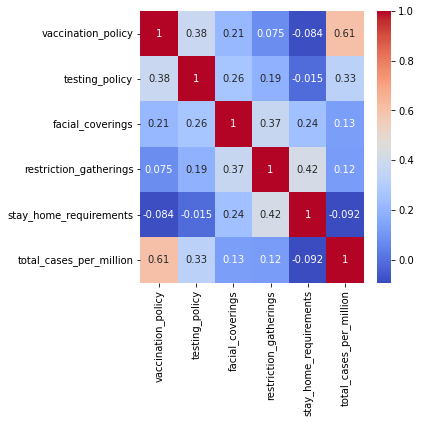

,total_cases_per_million
vaccination_policy,0.605264
testing_policy,0.327498
facial_coverings,0.126167
restriction_gatherings,0.116780
stay_home_requirements,-0.092445


In [119]:
df_correlation = determine_correlation(df_task_2, "total_cases_per_million")
plot_correlation_heatmaps(df_task_2, figsize=(5, 5), annot=True)
df_correlation

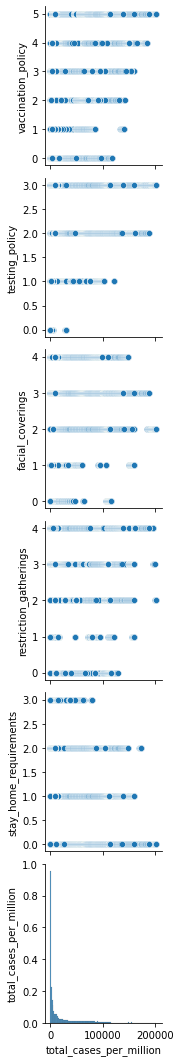

In [120]:
# Plot predictor variables against total deaths per million
df_scatter = df_task_2.drop(labels=['Entity', 'iso_code', 'date'], axis=1)
sns.pairplot(data=df_scatter, x_vars=['total_cases_per_million'])

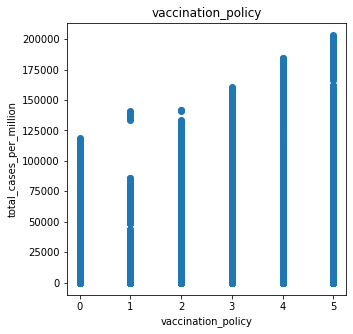

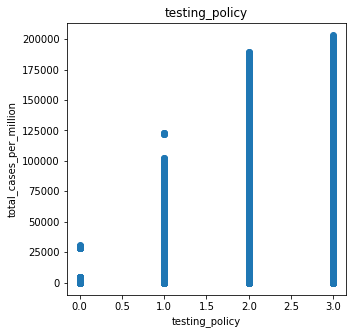

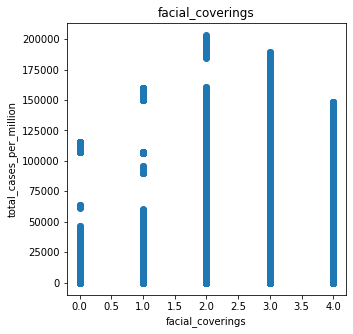

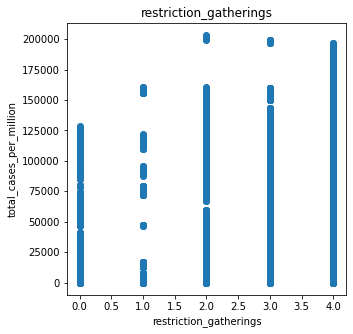

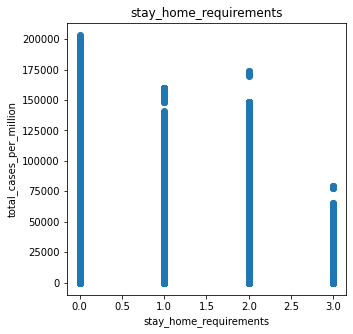

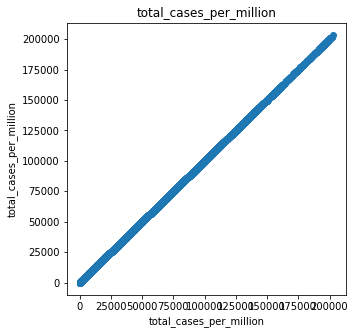

In [121]:
for col in df_scatter.columns:
  plt.figure(figsize=(5,5))
  plt.xlabel(col)
  plt.ylabel("total_cases_per_million")
  plt.title(col)
  plt.scatter(df_scatter[col], df_scatter["total_cases_per_million"])
  plt.show() 

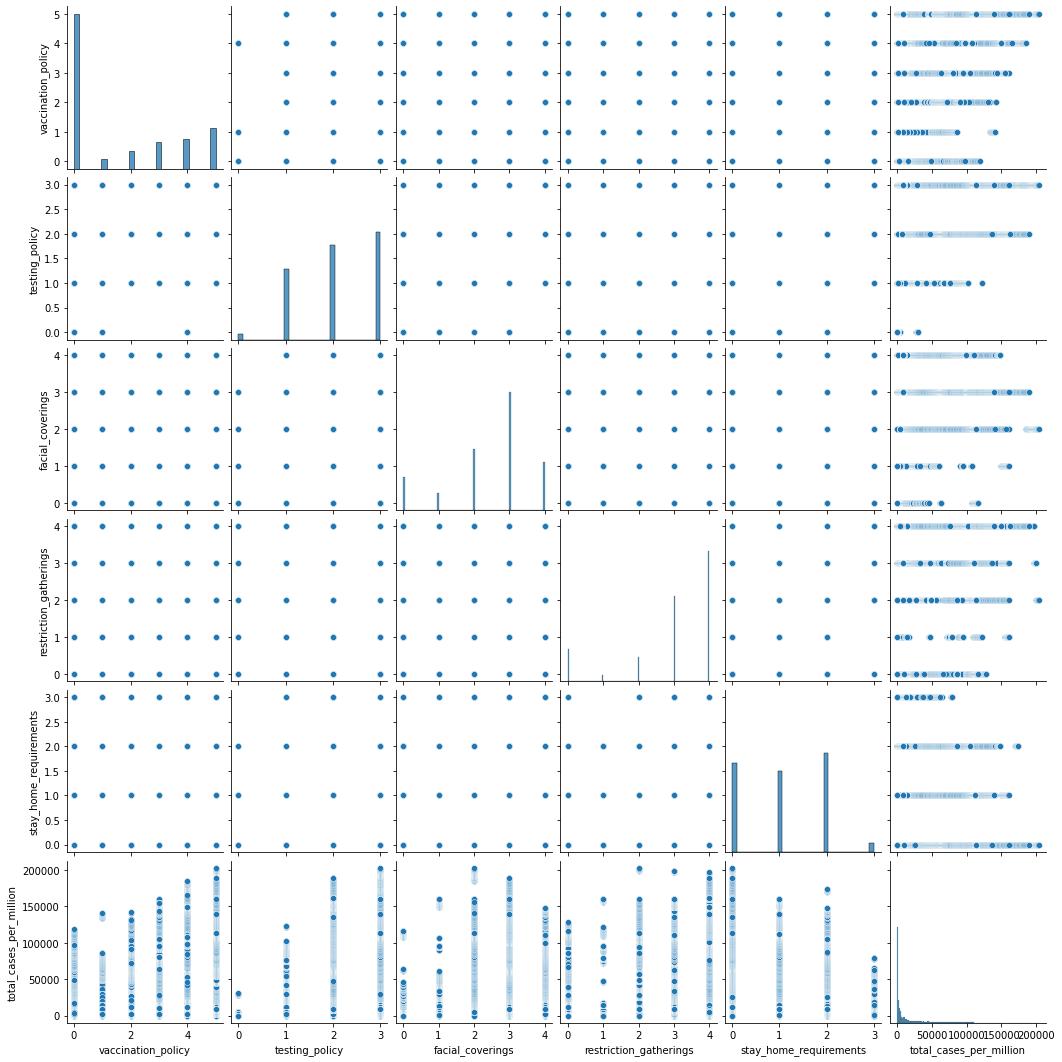

In [122]:
sns.pairplot(data=df_task_2)

### 2.4.2 Helper Functions and Code for Model
In this section, we defined functions that were utilised in the model, taken from the cohort lessons and [pre-class material](https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb).

In [123]:
def normalize_z(df):
  """Takes a DataFrame, returns a DataFrame with normalized values using z-score normalization."""
  dfout = (df - df.mean(axis=0)) / df.std(axis=0)
  return dfout

def normalize_minmax(df):
  """Takes a DataFrame, returns a DataFrame with normalized values using min-max normalization."""
  dfout = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
  return dfout

def transform_features(df_feature, colname, colname_transformed):
  """Takes a DataFrame, the name of a column to be transformed, and the name for the transformed column, returns a DataFrame with an additional column for the transformed data."""
  df_feature[colname_transformed] = df[colname].apply(lambda x: x**2)
  return df_feature

def get_features_targets(df, feature_names, target_names):
  """Takes a DataFrame, a list of columns for the features, and a list of columns for the target, returns a DataFrame containing the features and a DataFrame containing the target."""
  df_feature = df.loc[:, feature_names]
  df_target = df.loc[:, target_names]
  return df_feature, df_target

def prepare_feature(df_feature):
  """Takes a DataFrame containing the features, convert it into a numpy array, change it to a column vector, and add a column of '1's in the first column, returns a numpy.array containing the features."""
  cols = len(df_feature.columns)
  np_feature = df_feature.to_numpy().reshape(-1, cols)
  constants = np.ones(shape=(np_feature.shape[0], 1))
  return np.concatenate((constants, np_feature), axis=1)

def prepare_target(df_target):
  """Takes a DataFrame containing the target, convert it into a numpy array, change it to a column vector, returns a Numpy array containing the target."""
  cols = len(df_target.columns)
  np_target = df_target.to_numpy().reshape(-1, cols)
  return np_target

def predict(df_feature, beta):
  """Takes a DataFrame and an array of beta values, returns the predicted y values after z-normalization and conversion to a Numpy array."""
  df_feature = normalize_z(df_feature)
  np_X = prepare_feature(df_feature)
  return predict_norm(np_X, beta)

def predict_norm(X, beta):
  """Takes a Numpy array and an array of beta values, returns the straight line equation after standardization and adding of column for constant 1."""
  y_pred = np.matmul(X, beta)
  return y_pred
    
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
  """Takes a DataFrame containing the features, a DataFrame containing the target, the seed used to split randomly, and the fraction used to split randomly (default 0.5), returns a tuple of 4 DataFrames containing the train and test sets for the features and target DataFrames."""
  # indexes = which is the number of rows
  indexes = df_feature.index
  if random_state != None:
      np.random.seed(random_state)

  # k = length / size of the test array
  k = int(test_size * len(indexes))

  test_index = np.random.choice(indexes, k, replace=False)
  train_index = list(set(indexes) - set(test_index))

  df_feature_train = df_feature.loc[train_index, :]
  df_feature_test = df_feature.loc[test_index, :]
  df_target_train = df_target.loc[train_index, :]
  df_target_test = df_target.loc[test_index, :]

  return df_feature_train, df_feature_test, df_target_train, df_target_test

In [124]:
def compute_cost(X, y, beta):
  """Takes a Numpy array containing the features, a Numpy array containing the target, and beta coefficients at the end of the iteration, returns an array of computed cost function values."""
  J = 0
  m = X.shape[0]
  error = np.matmul(X, beta) - y
  error_sq = np.matmul(error.T, error)
  J = (1/(2*m))*error_sq
  J = J[0][0]
  return J


def gradient_descent(X, y, beta, alpha, num_iters):
  """Takes a Numpy array containing the features, a Numpy array containing the target, an array of beta values, the learning rate, the number of iterations to perform, returns the beta coefficient at the end of the iteration, and an array storing the cost value at each iteration."""
  m = X.shape[0]
  J_storage = np.zeros((num_iters,1))
  for n in range(num_iters):
    deriv = np.matmul(X.T, (np.matmul(X, beta)-y))
    beta = beta - alpha * (1/m) * deriv
    J_storage[n] = compute_cost(X, y, beta)
  return beta, J_storage

#### 2.4.2.1 Evaluating the Model
For accuracy metrics, we decided to look through the [scikit-learn Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) site in order to find possible metrics we could use.

As mentioned in the task brief, R<sup>2</sup> is not a good metric to be used for Multiple Linear Regression. As such, we decided to take into account the following metrics below.

* Adjusted R<sup>2</sup> Score: an improved version of R<sup>2</sup> score that penalizes us for adding an independent variable that does not help in predicting the dependent variable [1] [2]. By taking into account the number of independent variables used for predicting the target variable, we can determine whether adding new variables to the model actually increases the model fit [2].
* Residual Sum of Squares: total square of the distance of actual points from the regression line, variation in the target variable that is not explained by our model. [2]
* Total Sum of Squares: sum of squares of the difference between the actual values and their mean, variance of Y [2]
* Mean Squared Error: tells you how close a regression line is to a set of points [3]
* Root Mean Squared Error: the most common metric for regression models, follows an assumption that error are unbiased and follow a normal distribution [1] 
* Mean Absolute Error: average of all absolute errors [4]


Sources:
1. https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
2. https://www.analyticsvidhya.com/blog/2020/07/difference-between-r-squared-and-adjusted-r-squared/
3. https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/
4. https://www.statisticshowto.com/absolute-error/


In [125]:
def r2_score(target, pred):
  """Takes a Numpy array containing the target and a Numpy array containing the predicted values, returns the r2 score."""
  res = np.sum((target - pred) ** 2)
  ymean = np.mean(target)
  tot = np.sum((target - ymean) ** 2)
  r2 = 1 - res/tot
  return r2

def adjusted_r2_score(R2, n, k):
  """Takes the R^2 score, number of data points, and number of features, returns the adjusted r2 score."""
  num = (1 - R2) * (n - 1)
  den = n - k - 1
  return 1 - num/den

def ss_score(target, pred):
  """Takes a Numpy array containing the target and a Numpy array containing the predicted values, returns a tuple of the sum of square of residuals and total sum of squares."""
  # sum of square of residuals
  res = np.sum((target - pred) ** 2)
  # total sum of squares
  ymean = np.mean(target)
  tot = np.sum((target - ymean) ** 2)
  return res, tot

def mean_squared_error(target, pred):
  """Takes a Numpy array containing the target and a Numpy array containing the predicted values, returns the mean squared error."""
  ysum = np.sum((target - pred) ** 2)
  n = target.shape[0]
  return ysum/n

def mean_absolute_error(target, pred):
  """Takes a Numpy array containing the target and a Numpy array containing the predicted values, returns the mean absolute error."""
  ysum = np.sum(abs(target - pred))
  n = target.shape[0]
  return ysum / n

def root_mean_squared_error(target, pred):
  """Takes a Numpy array containing the target and a Numpy array containing the predicted values, returns the root mean squared error."""
  ysum = np.sum((target - pred) ** 2)
  n = target.shape[0]
  return np.sqrt(ysum/n)

In [126]:
def multiple_linear_regression(df_features, df_target):
  # Split the data set into training and test
  df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

  # Normalize the features using z normalization
  df_features_train_z = normalize_z(df_features_train)

  # Change the features and the target to numpy array using the prepare functions
  X = prepare_feature(df_features_train_z)
  target = prepare_target(df_target_train)

  iterations = 1500
  alpha = 0.1
  beta = np.zeros((X.shape[1], 1), dtype=float)

  # Call the gradient_descent function
  beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
  
  # call the predict() method
  pred = predict(df_features_test, beta)

  # # Plotting figures for visualisation
  # plt.figure()
  # plt.title("J_storage")
  # plt.plot(J_storage)
  for column in df_features_test.columns:
    plt.figure()
    plt.xlabel(column)
    plt.ylabel("total_cases_per_million")
    plt.scatter(df_features_test[column], np.array(df_target_test), color='blue')
    plt.scatter(df_features_test[column], pred, color='orange')
    plt.show()

  # Change target test set to a numpy array
  target = df_target_test.to_numpy()

  # Calculate R^2, Adjusted R^2, MSE, RMSE, MAE
  print("R^2 Score: ", r2_score(target, pred))
  print("Adjusted R^2 Score: ", adjusted_r2_score(r2_score(target, pred), X.shape[0], X.shape[1]))
  print("SSᵣ (sum of the square of residuals): ", ss_score(target, pred)[0])
  print("SSₜ (total sum of errors if we take the mean of the observed values as the predicted value): ", ss_score(target, pred)[1])
  print("Mean Square Error: ", mean_squared_error(target, pred))
  print("Root Mean Squared Error: ", root_mean_squared_error(target, pred))
  print("Mean Absolute Error: ", mean_absolute_error(target, pred))

  return beta

#### 2.4.2.2 Running Model on Original Dataset

Predictor Variables (X)

Variable (X) | Description | Grouped By
:------------------ | :------------------|:-----------------
testing_policy | Government policies on PCR testing for COVID-19 | No testing policy, Testing only for those who both (a) have symptoms AND (b) meet specific criteria (e.g. key workers, admitted to hospital, came into contact with a known case, returned from overseas), Testing of anyone showing COVID-19 symptoms, Open public testing (e.g “drive through” testing available to asymptomatic people)
vaccination_policy | Policies on the availability of vaccinations | No availability, Availability for ONE of following: key workers/ clinically vulnerable groups/elderly groups, Availability for TWO of following: key workers/clinically vulnerable groups/elderly groups, Availability for ALL of following: key workers/clinically vulnerable groups/elderly groups, Availability for all three plus partial additional availability (select broad groups/ages), Universal availability
facial_coverings | Government policies on the use of face coverings outside-of-the-home | No policy, Recommended, Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible, Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible, Required outside the home at all times regardless of location or presence of other people
restriction_gatherings | Government policies on restrictions on public gatherings | No restrictions, Restrictions on very large gatherings (the limit is above 1000 people), Restrictions on gatherings between 100 to 1000 people,Restrictions on gatherings between 10 to 100 people, Restrictions on gatherings of less than 10 people
stay_home_requirements | Government policies on stay-at-home requirements or household lockdowns | No measures, Recommended not to leave the house, Required to not leave the house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips, Required to not leave the house with minimal exceptions (e.g. allowed to leave only once every few days, or only one person can leave at a time, etc.)

Predicted Variable (y)

Variable (y) | Description | Category
:------------------ | :------------------|:-----------------
total_cases_per_million | Total confirmed cases of COVID-19 per 1,000,000 people | Confirmed cases


In [127]:
# Extract features and targets
features = ['testing_policy', 'vaccination_policy', 'facial_coverings', 'restriction_gatherings', 'stay_home_requirements']
target = ['total_cases_per_million']
columns = features + target

df_features, df_target = get_features_targets(df_task_2.loc[:, columns].dropna(axis=0), features, target)

display(df_features.describe())
display(df_target.describe())

,testing_policy,vaccination_policy,facial_coverings,restriction_gatherings,stay_home_requirements
count,68345.000000,68345.000000,68345.000000,68345.000000,68345.000000
mean,2.091053,1.572975,2.497856,3.015978,1.116951
std,0.834485,1.976444,1.194038,1.279919,0.893945
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,3.000000,0.000000
50%,2.000000,0.000000,3.000000,3.000000,1.000000
75%,3.000000,3.000000,3.000000,4.000000,2.000000
max,3.000000,5.000000,4.000000,4.000000,3.000000


,total_cases_per_million
count,68345.000000
mean,21353.319636
std,33236.145521
min,0.001000
25%,477.067000
50%,4499.892000
75%,28553.248000
max,203027.639000


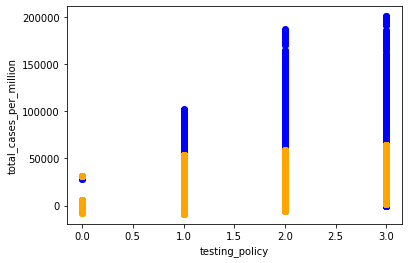

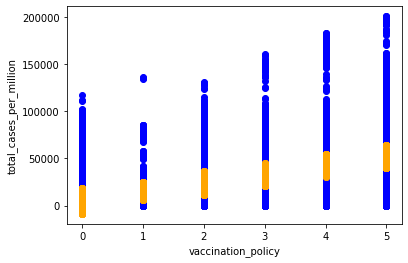

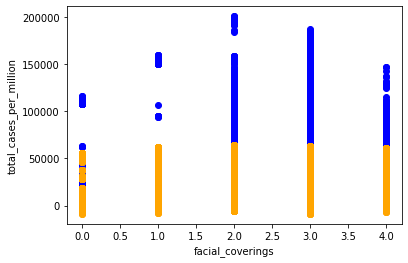

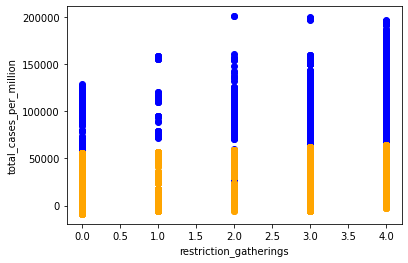

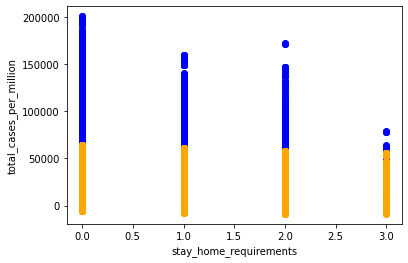

R^2 Score:  0.3948418093820433
Adjusted R^2 Score:  0.3947659036823734
SSᵣ (sum of the square of residuals):  13674884473398.535
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  22597206293175.08
Mean Square Error:  666969929.9321336
Root Mean Squared Error:  25825.760974889658
Mean Absolute Error:  16864.90869382089
[[21327.6051965 ]
 [ 3755.24141949]
 [18513.43631443]
 [-1335.93848313]
 [ 3203.42058438]
 [-2556.16610382]]


In [128]:
# multiple_linear_regression function returns the coefficients of linear regression
beta = multiple_linear_regression(df_features, df_target)
print(beta)

### 2.4.3 Improving the Model

#### 2.4.3.1 Improvement 1: Running Model on Selected Countries
With an Adjusted R<sup>2</sup> score of 0.395 (to 3sf), we hypothesised that each country would be affected differently by the virus and the different policies. Hence there actually is a variance in total cases per million between the countries even if countries share the exact same stringency for all their policies. This can result in high error when we generalize our regression formula for all countries. Thus we tried to improve this by passing our model through selected countries individually to produce a regression formula for each individual country. This is so that we take into account how different countries may be affected at different rates and by different policies, hence resulting in higher accuracy between predicted and actual total cases per million.

In [129]:
df_task_2['iso_code'].value_counts() > 600

MEX     True
KOR     True
CHN     True
JPN     True
SGP     True
USA     True
FRA     True
AUS     True
CAN     True
FIN     True
MYS     True
VNM     True
DEU     True
DNK     True
ESP     True
ITA     True
GBR     True
SWE     True
BEL     True
ARE     True
RUS     True
ZAF     True
KHM     True
EGY     True
IND     True
GTM     True
GRC     True
LBN     True
LVA     True
PRT     True
ISR     True
LUX     True
MAR     True
ALB     True
GEO     True
IRN     True
CHE     True
AUT     True
NLD     True
ECU     True
NOR     True
IRL     True
AND     True
DZA     True
DOM     True
LTU     True
AZE     True
BGD     True
ROU     True
BRA     True
LIE     True
MLT     True
BIH     True
BTN     True
BLR     True
NGA     True
CYP     True
QAT     True
POL     True
IDN     True
HUN     True
MNG     True
SRB     True
CZE     True
ISL     True
BRN     True
CRI     True
SMR     True
MCO     True
MRT     True
COG     True
BGR     True
VEN     True
GAB     True
KAZ     True
SAU     True
URY     True

In [130]:
# Countries were obtained from the sorting above
countries = ['IDN', 'HUN', 'MNG', 'CZE', 'SRB', 'BRN', 'CRI', 'MRT', 'MCO', 'SMR', 'BGR', 'GAB', 'COG', 'VEN', 'URY', 'KAZ', 'SAU', 'HRV', 'COL', 'KGZ']
countries = sorted(countries)

BGR


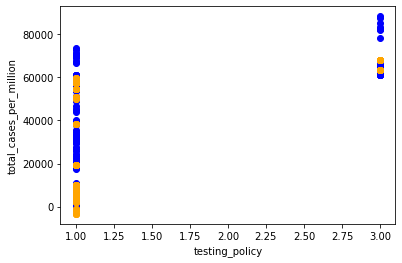

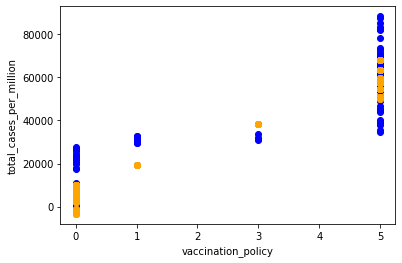

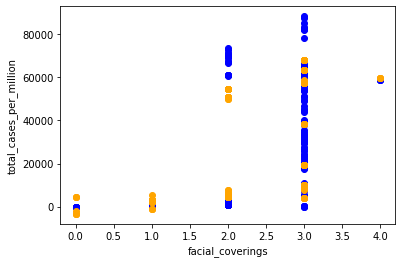

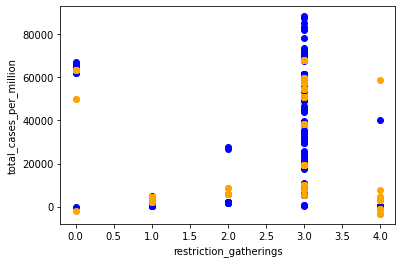

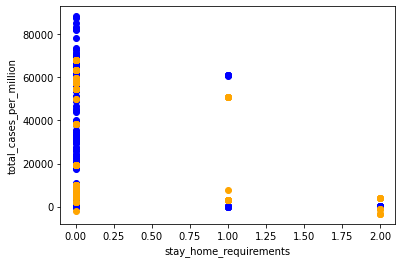

R^2 Score:  0.901978205430751
Adjusted R^2 Score:  0.9005644295475407
SSᵣ (sum of the square of residuals):  14228690744.710411
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  145158439582.11084
Mean Square Error:  78611551.07574813
Root Mean Squared Error:  8866.315529900125
Mean Absolute Error:  6898.874872919917
[[30608.89458865]
 [ 4022.24502121]
 [22604.46143461]
 [ 2038.50075396]
 [ 1724.54070327]
 [-2060.57023258]]


BRN


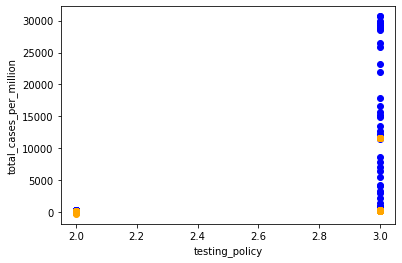

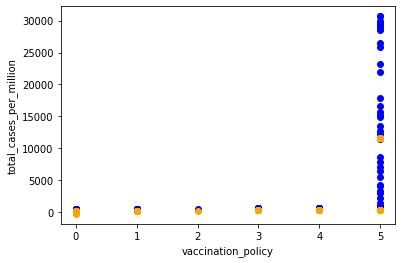

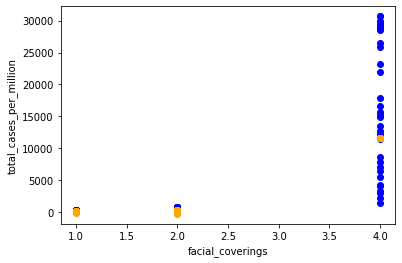

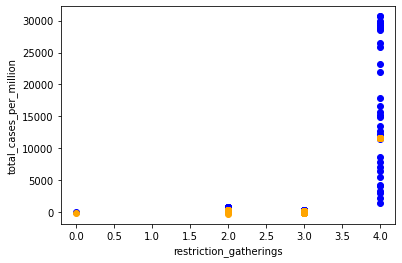

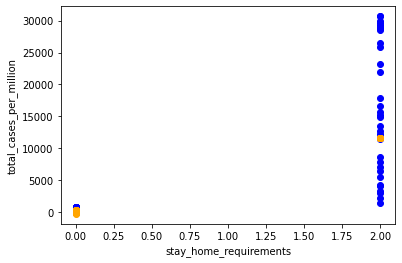

R^2 Score:  0.5988665493067276
Adjusted R^2 Score:  0.593108652885293
SSᵣ (sum of the square of residuals):  3938112208.679718
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  9817461500.339954
Mean Square Error:  21637979.168569878
Root Mean Squared Error:  4651.664128951044
Mean Absolute Error:  1858.6043798184396
[[2126.14799765]
 [ 212.52682048]
 [  64.04805643]
 [-349.29540329]
 [ 117.37342121]
 [4500.978535  ]]


COG


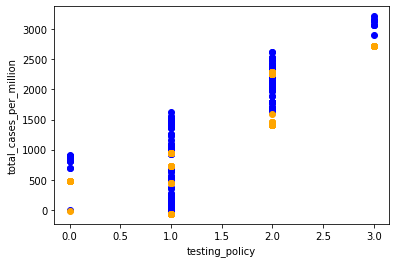

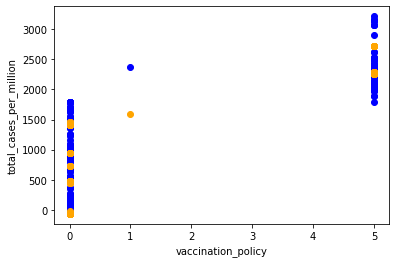

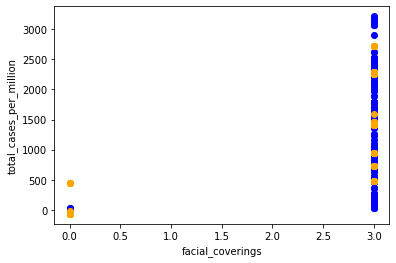

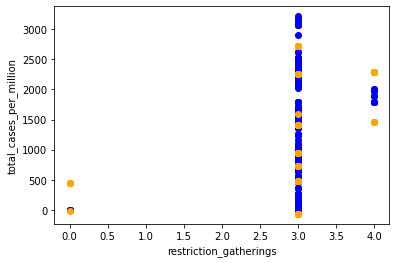

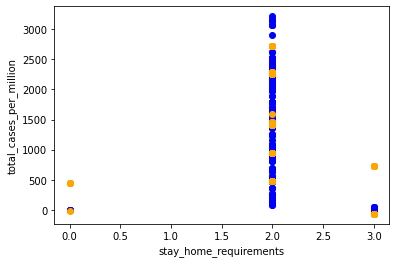

R^2 Score:  0.806030193590159
Adjusted R^2 Score:  0.8032325521515555
SSᵣ (sum of the square of residuals):  28098245.200840764
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  144858860.87586063
Mean Square Error:  155238.92376155118
Root Mean Squared Error:  394.0037103398281
Mean Absolute Error:  324.9738999412505
[[1320.43418203]
 [ 334.22721512]
 [ 391.67560716]
 [ 215.01043624]
 [  22.28007837]
 [ -93.09602382]]


COL


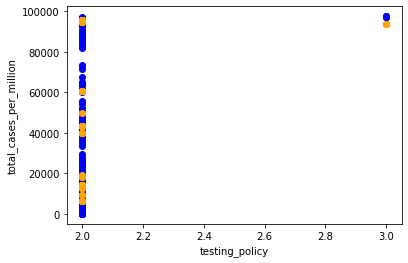

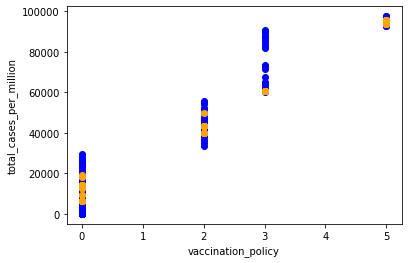

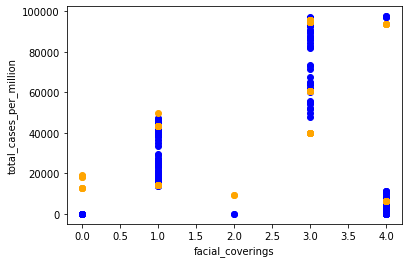

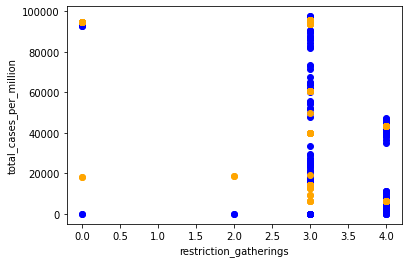

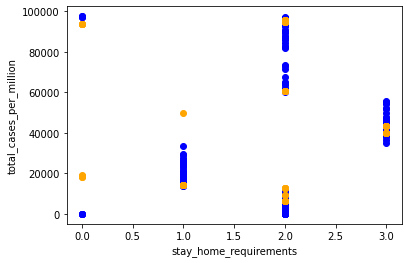

R^2 Score:  0.9293036283545331
Adjusted R^2 Score:  0.928281512137972
SSᵣ (sum of the square of residuals):  16238324996.77252
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  229691066441.2255
Mean Square Error:  90212916.64873622
Root Mean Squared Error:  9498.04804413708
Mean Absolute Error:  6430.547140800756
[[38873.75563744]
 [-1147.69461641]
 [33974.17242921]
 [-2148.79638401]
 [  298.92598083]
 [-2573.02877652]]


CRI


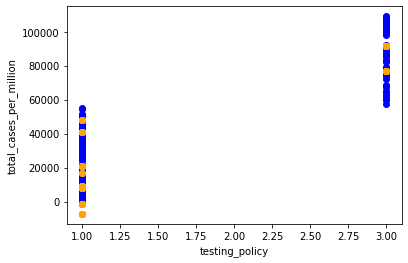

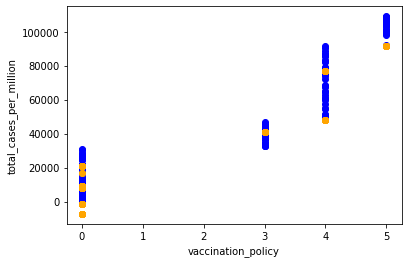

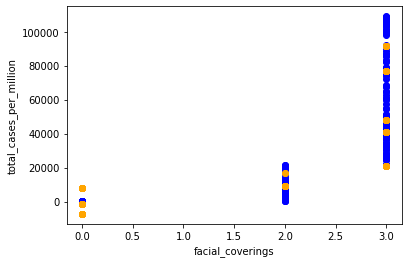

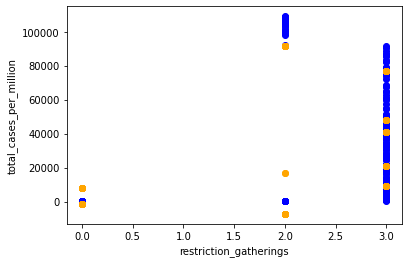

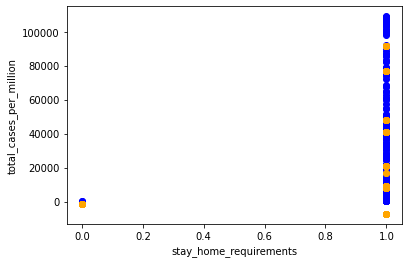

R^2 Score:  0.9489883009195865
Adjusted R^2 Score:  0.9482560755739347
SSᵣ (sum of the square of residuals):  11119992864.304617
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  217989070443.92615
Mean Square Error:  61436424.66466639
Root Mean Squared Error:  7838.139107254118
Mean Absolute Error:  6344.790843232581
[[37030.64083059]
 [13280.52803464]
 [13136.97367176]
 [13309.15002301]
 [-6851.92652969]
 [ 2069.04955341]]


CZE


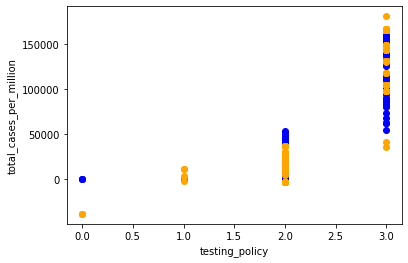

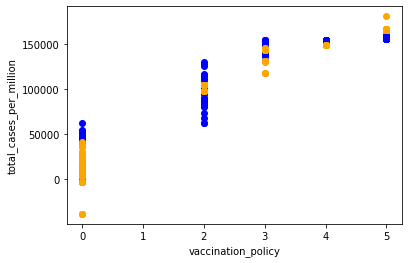

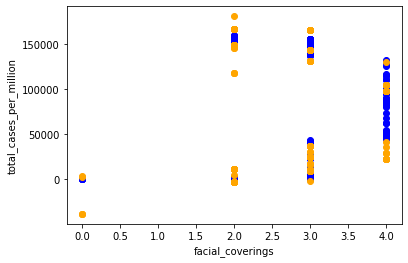

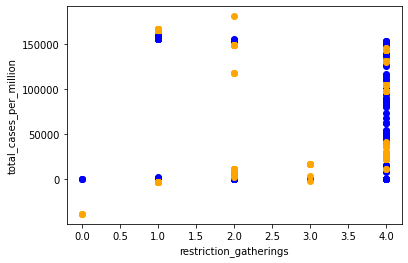

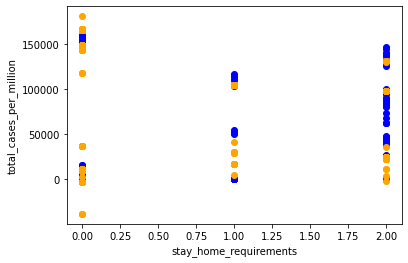

R^2 Score:  0.9452047477014491
Adjusted R^2 Score:  0.9444106136101658
SSᵣ (sum of the square of residuals):  43806137423.55936
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  799451331748.2775
Mean Square Error:  243367430.1308853
Root Mean Squared Error:  15600.238143402981
Mean Absolute Error:  12464.831444374218
[[75472.12638242]
 [ 8234.47626035]
 [62100.52511675]
 [-1634.3100943 ]
 [18802.55420846]
 [-5646.59810744]]


GAB


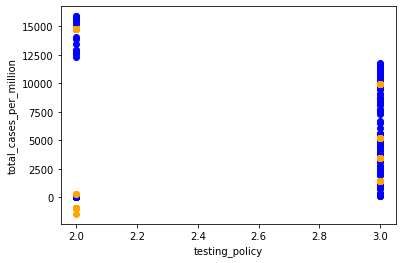

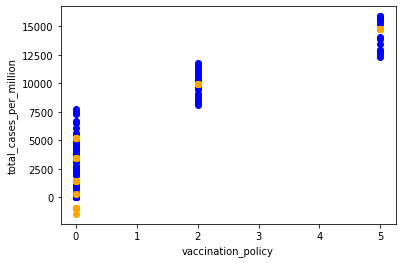

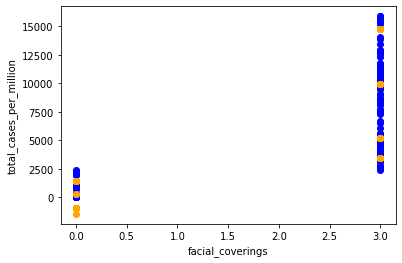

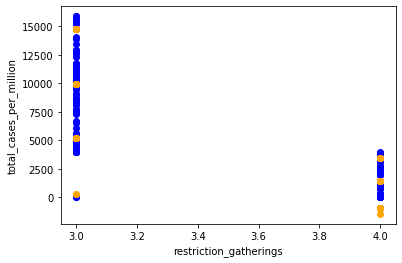

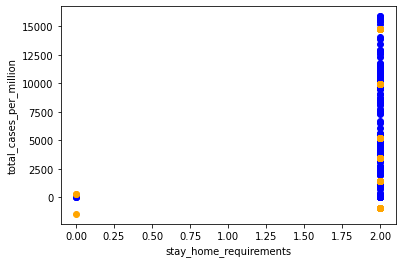

R^2 Score:  0.9473542364156624
Adjusted R^2 Score:  0.9465949225178114
SSᵣ (sum of the square of residuals):  187813930.06385708
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  3567503200.195442
Mean Square Error:  1037646.0224522491
Root Mean Squared Error:  1018.6491164538695
Mean Absolute Error:  875.5640212831647
[[6296.60105674]
 [ 863.44085677]
 [3622.3875962 ]
 [ 796.46496593]
 [-837.28146825]
 [  69.74851054]]


HRV


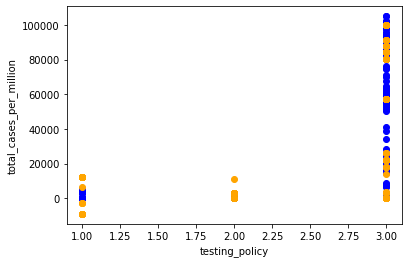

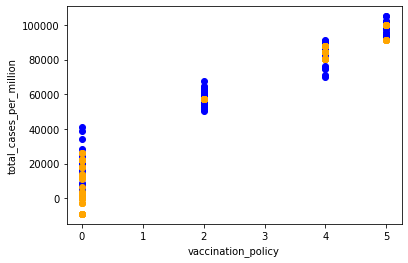

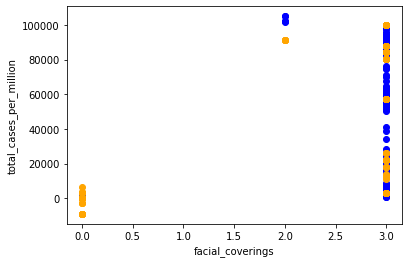

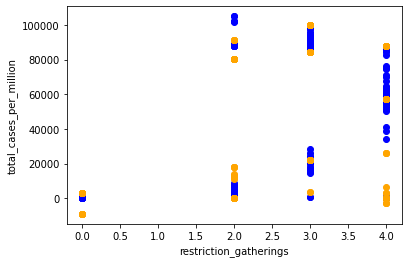

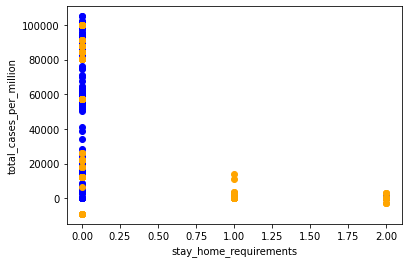

R^2 Score:  0.9725358090019857
Adjusted R^2 Score:  0.9721387363610505
SSᵣ (sum of the square of residuals):  7528005991.561647
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  274102593886.92422
Mean Square Error:  41822255.50867582
Root Mean Squared Error:  6467.012873705744
Mean Absolute Error:  5137.231143203097
[[42172.02809716]
 [ 2074.19053791]
 [29899.39590802]
 [ 5776.86021697]
 [ 4915.53456078]
 [-2781.02828069]]


HUN


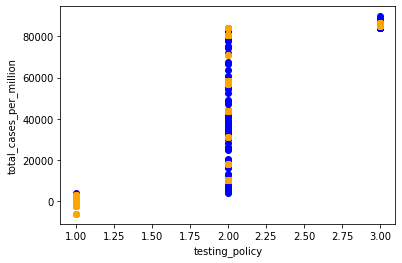

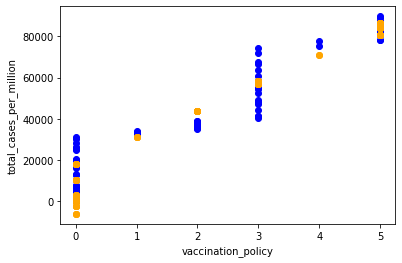

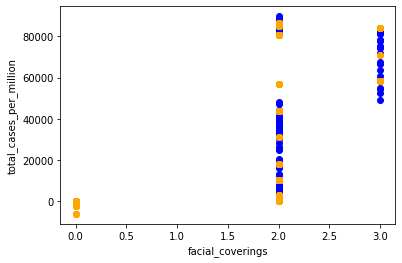

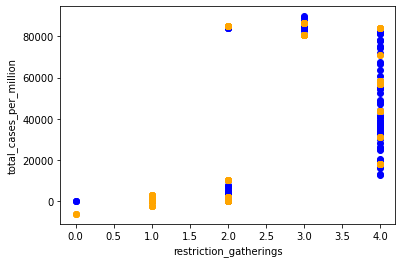

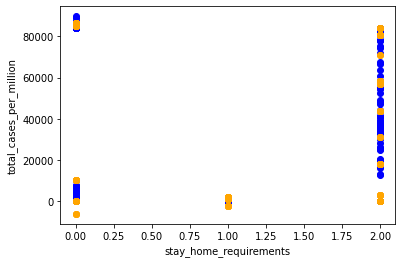

R^2 Score:  0.9826896957611546
Adjusted R^2 Score:  0.9824418155095244
SSᵣ (sum of the square of residuals):  4077521624.479681
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  235554590388.3921
Mean Square Error:  22403964.96966858
Root Mean Squared Error:  4733.282684318419
Mean Absolute Error:  3464.7009932275
[[38900.27284977]
 [ 7885.00521443]
 [28354.86550928]
 [ 1087.75503468]
 [ 1625.79329352]
 [ 2085.18693762]]


IDN


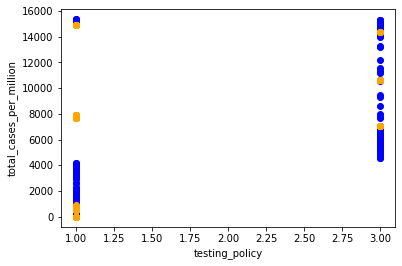

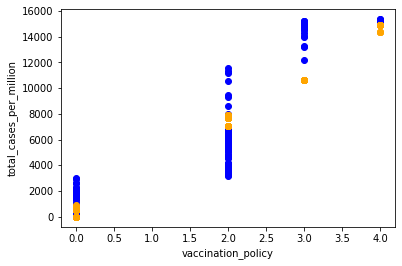

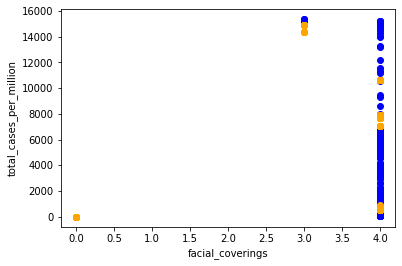

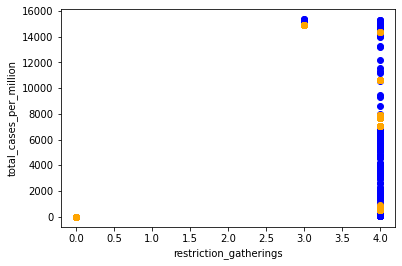

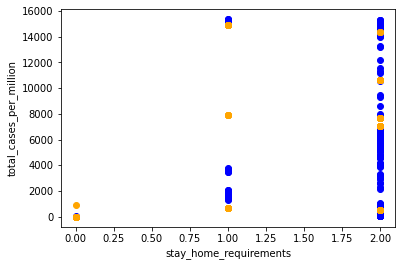

R^2 Score:  0.8580630959294606
Adjusted R^2 Score:  0.8560354258713101
SSᵣ (sum of the square of residuals):  728642846.7833582
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  5133568690.643269
Mean Square Error:  3981654.9004555093
Root Mean Squared Error:  1995.4084545414528
Mean Absolute Error:  1385.3283531973173
[[4655.22617799]
 [-314.79891651]
 [4895.71596832]
 [ -99.837618  ]
 [ 335.39825242]
 [-124.55054188]]


KAZ


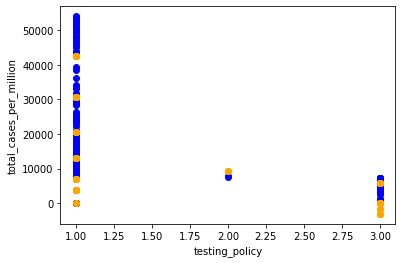

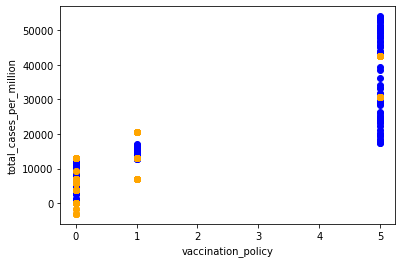

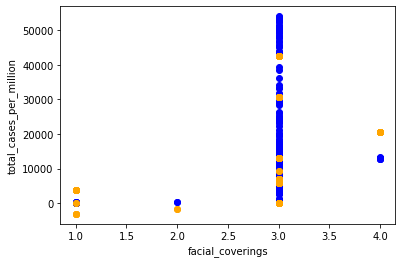

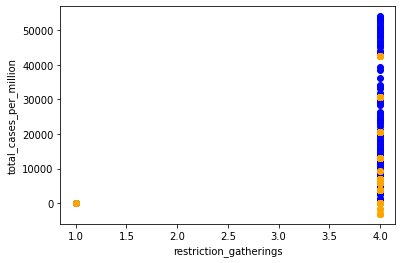

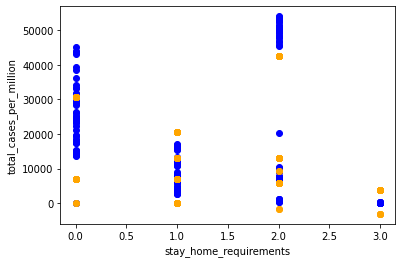

R^2 Score:  0.8485882158143832
Adjusted R^2 Score:  0.8464043920040136
SSᵣ (sum of the square of residuals):  7118472197.190986
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  47013990591.80492
Mean Square Error:  39547067.76217214
Root Mean Squared Error:  6288.645940277775
Mean Absolute Error:  5277.670997766337
[[16357.86207092]
 [-3065.18126507]
 [13423.06809587]
 [ 5157.46527993]
 [-1461.72493881]
 [ 5751.68890897]]


KGZ


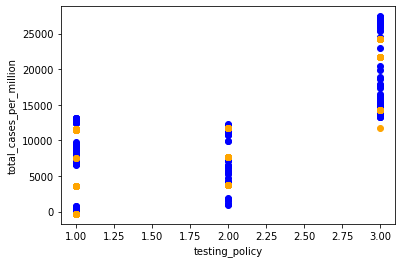

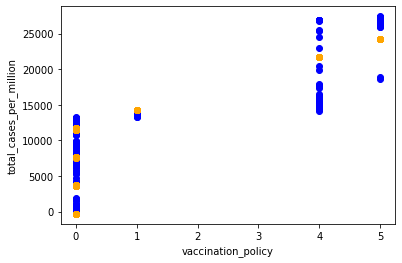

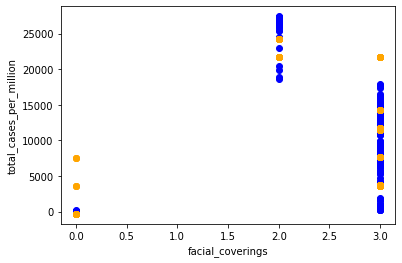

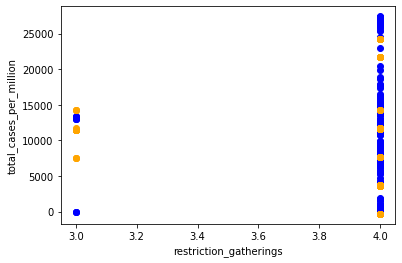

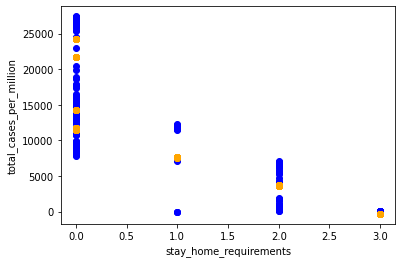

R^2 Score:  0.8529583161145992
Adjusted R^2 Score:  0.8508272772177092
SSᵣ (sum of the square of residuals):  1950946081.5403466
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  13267979731.92993
Mean Square Error:  10838589.341890814
Root Mean Squared Error:  3292.20129121699
Mean Absolute Error:  2730.480450882072
[[12193.01933017]
 [  134.34690441]
 [ 5071.72130352]
 [  -15.51068507]
 [   13.76241669]
 [-4107.78775129]]


MCO


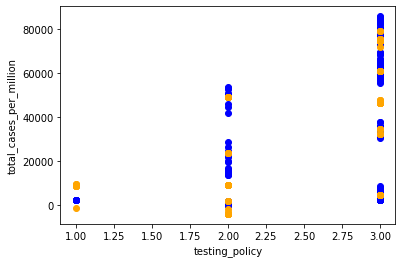

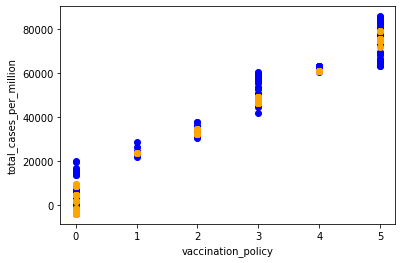

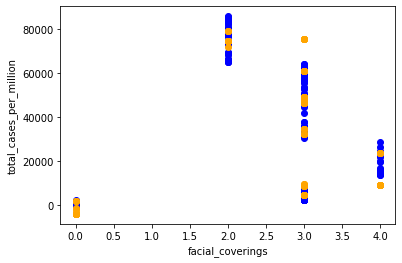

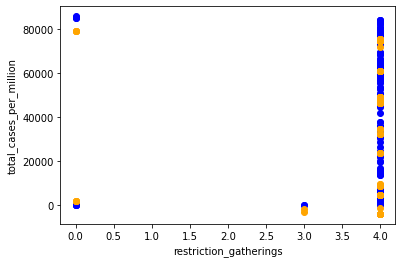

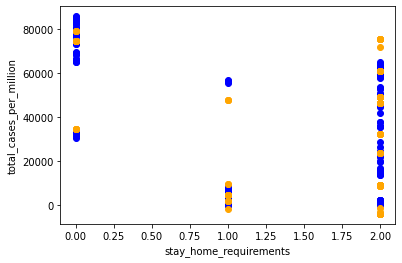

R^2 Score:  0.9671533545082542
Adjusted R^2 Score:  0.9666807409040564
SSᵣ (sum of the square of residuals):  5848514749.519983
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  178055160944.50763
Mean Square Error:  32312236.185193278
Root Mean Squared Error:  5684.385295279805
Mean Absolute Error:  4533.328247114425
[[33343.22008491]
 [-1435.04199999]
 [31042.17557022]
 [ 3224.66118376]
 [ -918.0819645 ]
 [-1012.77604726]]


MNG


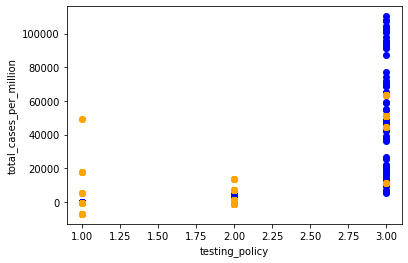

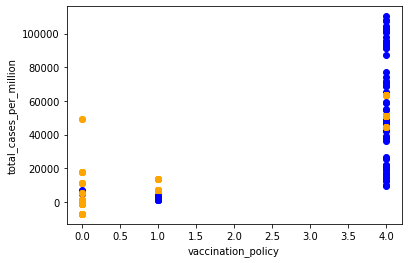

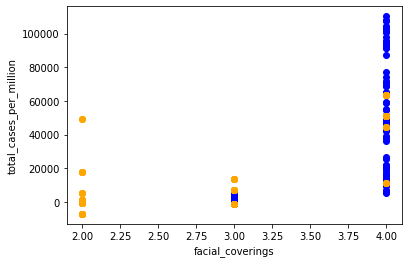

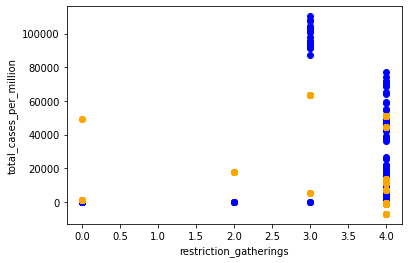

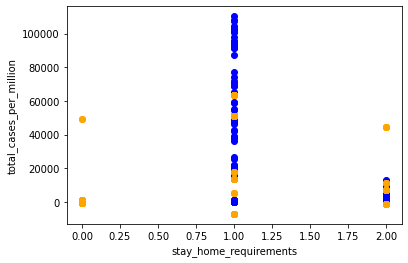

R^2 Score:  0.707156374520016
Adjusted R^2 Score:  0.7029728941560163
SSᵣ (sum of the square of residuals):  52720887871.24051
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  180030853616.25537
Mean Square Error:  289675208.08373904
Root Mean Squared Error:  17019.847475337112
Mean Absolute Error:  10663.461217290633
[[ 18181.94420141]
 [-34849.24088364]
 [ 15185.16527363]
 [ 52821.63752963]
 [-20545.1493438 ]
 [ -4981.45864857]]


MRT


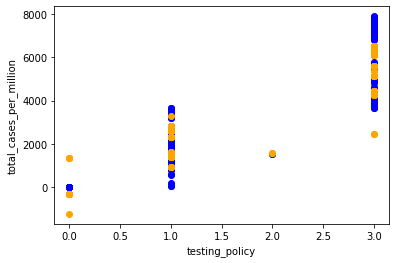

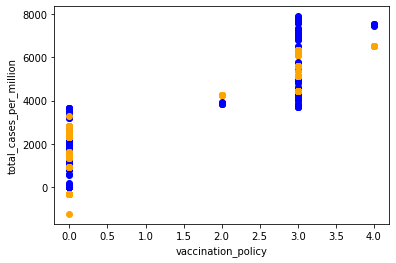

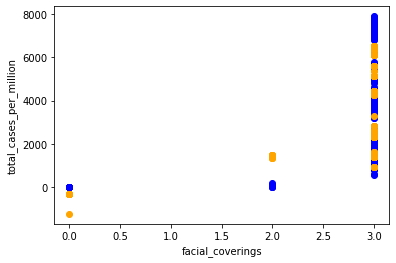

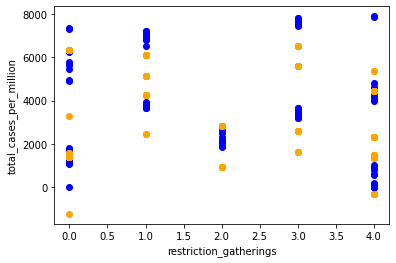

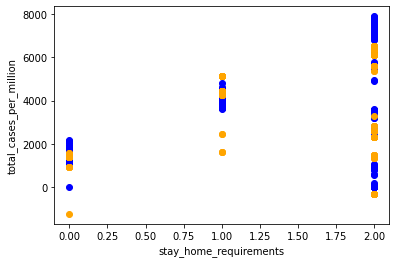

R^2 Score:  0.8263186785202362
Adjusted R^2 Score:  0.8238196667003834
SSᵣ (sum of the square of residuals):  179112876.33252358
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  1031273108.7400935
Mean Square Error:  989573.9023896331
Root Mean Squared Error:  994.7732919563297
Mean Absolute Error:  771.9199610713757
[[3029.09844811]
 [ 185.51622647]
 [1356.00846611]
 [ 735.43615531]
 [-395.98349291]
 [ 801.97905726]]


SAU


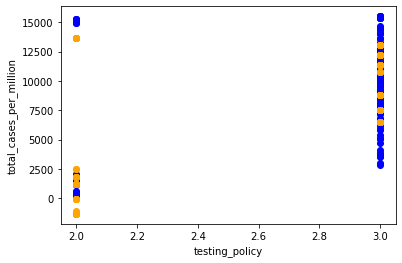

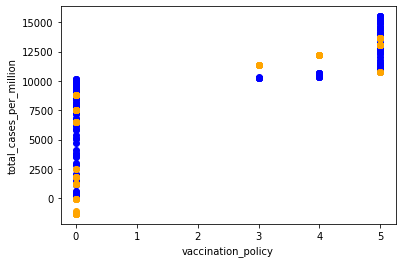

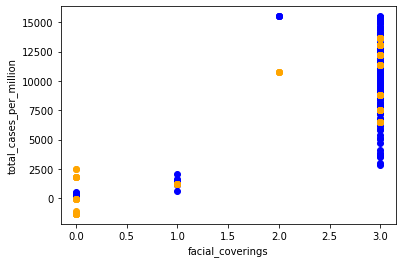

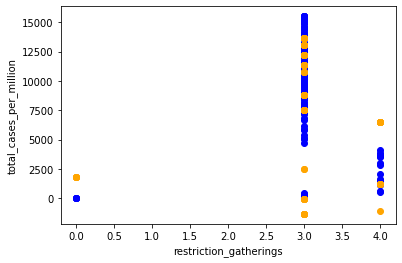

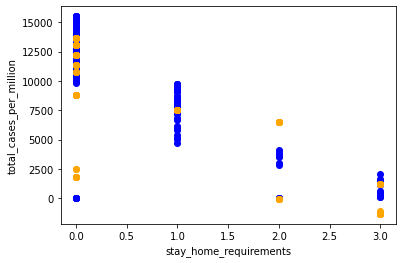

R^2 Score:  0.8478476180250045
Adjusted R^2 Score:  0.8456531125157498
SSᵣ (sum of the square of residuals):  593811458.6787572
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  3902741784.064501
Mean Square Error:  3298952.5482153175
Root Mean Squared Error:  1816.301887962273
Mean Absolute Error:  1594.1160916365588
[[ 9388.3916383 ]
 [ -211.84656465]
 [ 2019.52673446]
 [ 2229.5617117 ]
 [  131.83733607]
 [-1153.83195412]]


SMR


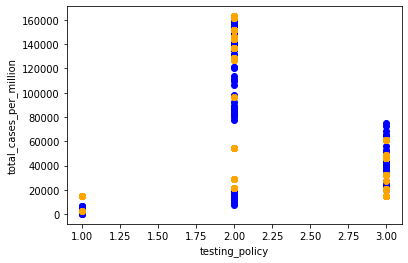

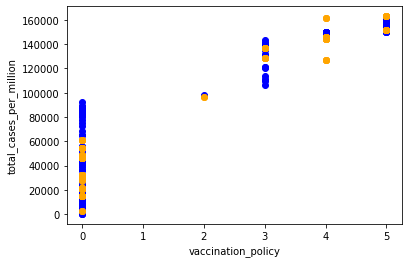

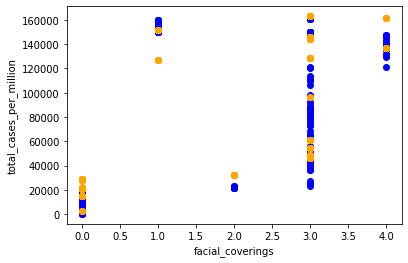

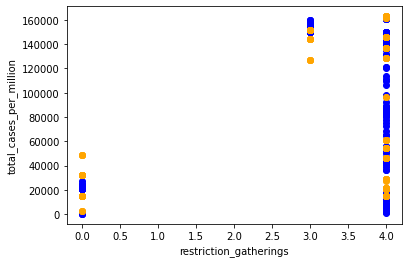

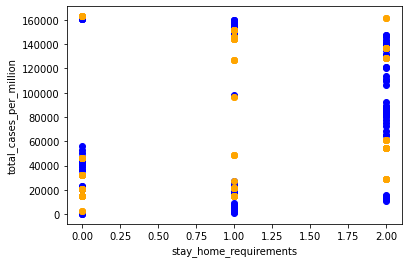

R^2 Score:  0.9604740881540889
Adjusted R^2 Score:  0.9599053699980326
SSᵣ (sum of the square of residuals):  26357856016.313133
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  666850043057.002
Mean Square Error:  145623513.9022825
Root Mean Squared Error:  12067.456811701566
Mean Absolute Error:  8851.750947160064
[[78860.82341038]
 [ 3707.41074741]
 [52740.12457882]
 [12564.69899667]
 [ 2258.15933273]
 [ 5548.97969372]]


SRB


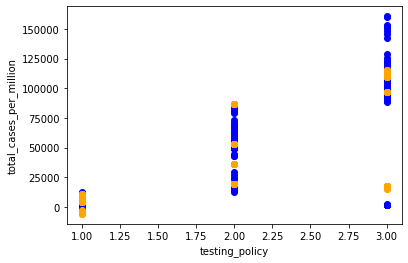

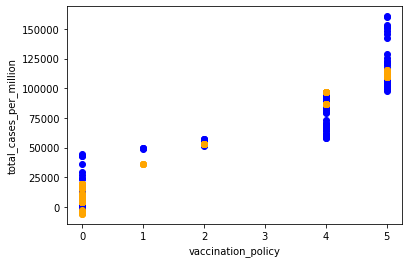

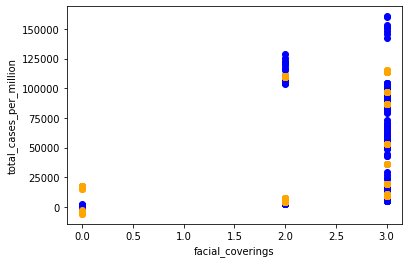

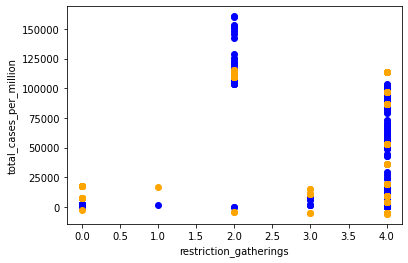

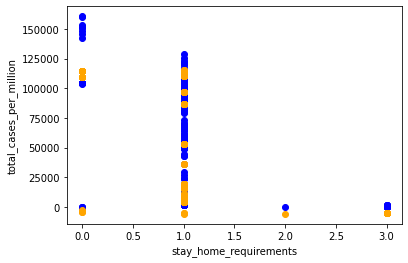

R^2 Score:  0.931315443288298
Adjusted R^2 Score:  0.9303176046920021
SSᵣ (sum of the square of residuals):  29054377053.56627
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  423011786703.6645
Mean Square Error:  162314955.60651547
Root Mean Squared Error:  12740.28867830378
Mean Absolute Error:  9109.914315166972
[[52493.28720952]
 [ 8608.04621712]
 [38029.41412043]
 [ 5772.77472439]
 [-1115.77928312]
 [  227.01595408]]


URY


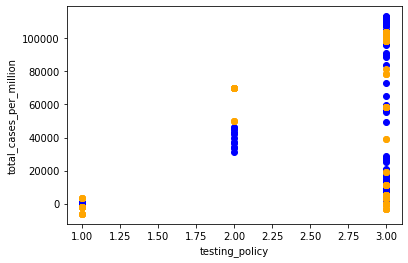

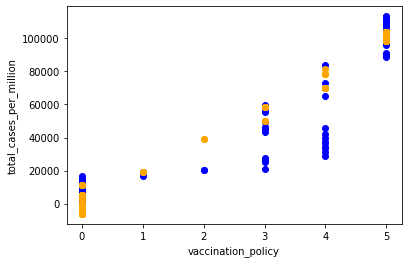

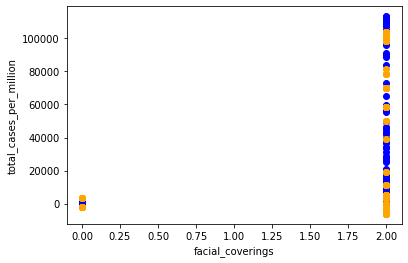

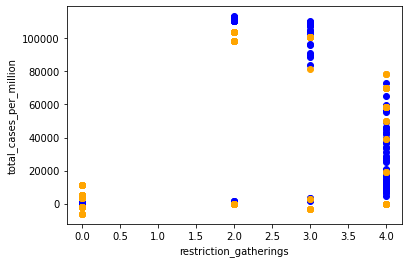

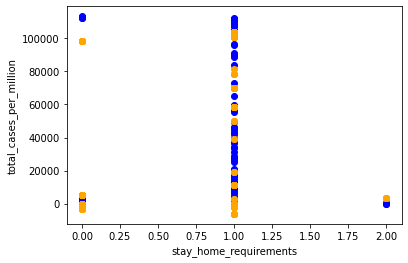

R^2 Score:  0.9326176889708871
Adjusted R^2 Score:  0.9316458287156596
SSᵣ (sum of the square of residuals):  25418484984.41051
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  377227859896.7664
Mean Square Error:  141213805.4689473
Root Mean Squared Error:  11883.341511079587
Mean Absolute Error:  8367.69636480569
[[36802.43377069]
 [ 6440.13189898]
 [44157.52008345]
 [-1358.10183682]
 [-4488.7432833 ]
 [ 2798.14641346]]


VEN


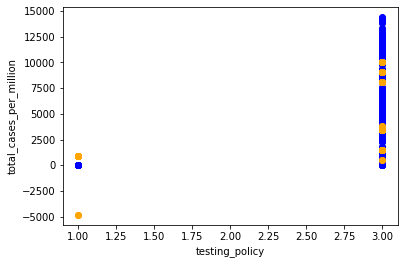

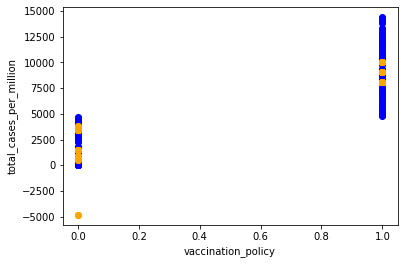

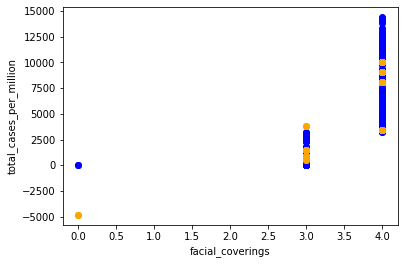

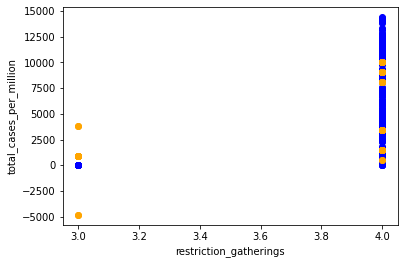

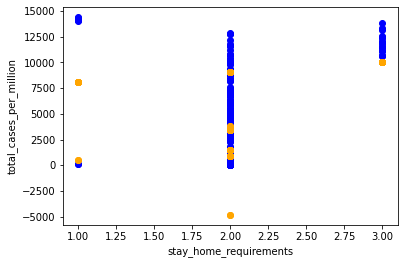

R^2 Score:  0.7597960011529536
Adjusted R^2 Score:  0.756331520400352
SSᵣ (sum of the square of residuals):  861079335.6097133
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  3584783516.272845
Mean Square Error:  4757344.395633775
Root Mean Squared Error:  2181.1337408865543
Mean Absolute Error:  1633.5949346424786
[[5072.17749645]
 [ 869.15954838]
 [2806.97111607]
 [1182.90677707]
 [-732.33161145]
 [ 371.85013802]]




In [131]:
beta_per_country = []
for country in countries:
  print(country)
  df_features, df_target = get_features_targets(df_task_2[df_task_2['iso_code'] == country].dropna(axis=0), features, target)
  beta = multiple_linear_regression(df_features, df_target)
  print(beta)
  print("\n")
  beta_per_country.append(beta.tolist())

By running the model on selected countries and having a different regression model per country, we see that the adjusted R<sup>2</sup> value for most countries was around 0.8 to 0.9. The RMSE value had also gone down. This goes to show that predicting total cases could have been different based on the country, and that each country has unique features and the trend for total cases may not be universal. 

As such, our bonus webpage was on a country-by-country basis.

#### 2.4.3.2 Improvement 2: Removing 'total_cases_per_million' as a predicted variable
When we used policies to predict the total cases per million, we found that there was a weak correlation between the policies and the total cases per million. This is possibly due to the policies not being one of the bigger impacts on the total cases per million as compared to factors such as transmission ability of the virus, introduction of a new strand, or the reproduction rate. These factors have a much larger and more direct impact on the total cases per million and these factors are not something that can be resolved by the implementation of government policies.Thus it would not be accurate to estimate the total cases per million  based on the government policies implemented at that current time.

##### 2.4.3.2.1 Visualisation and Plots
Similar to Section 1.4.1 above, for visualisation of the data, we made use of Matplotlib and Seaborn that were introduced to us in class and the [pre-class material](https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb). 

As the code for visualisation was repeated over the course of this report, they were defined as functions in the earlier sections. 

For any data that required preprocessing or further DataFrame analysis, we made use of codes from the cohort lessons and [pre-class material](https://github.com/Data-Driven-World/d2w_notes/blob/master/Working_With_Data.ipynb). 
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


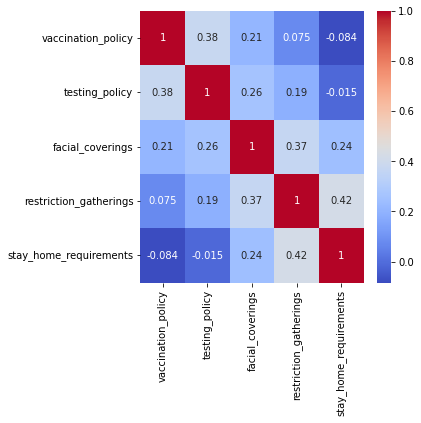

,stay_home_requirements
restriction_gatherings,0.416096
facial_coverings,0.241858
testing_policy,-0.015319
vaccination_policy,-0.084377
total_cases_per_million,-0.092445


In [132]:
df_drop_cases = df_task_2.drop(['total_cases_per_million'], axis=1)
df_correlation = determine_correlation(df_task_2, "stay_home_requirements")
plot_correlation_heatmaps(df_drop_cases, figsize=(5, 5), annot=True)
df_correlation

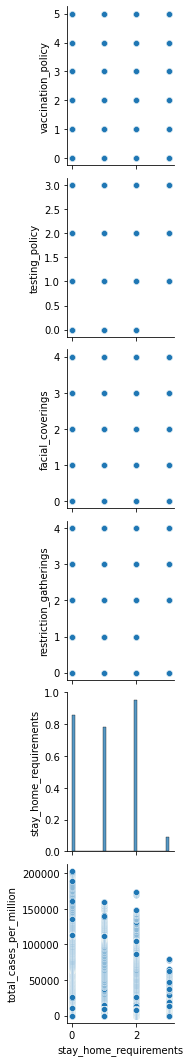

In [133]:
# Plot predictor variables against total deaths per million
df_scatter = df_task_2.drop(labels=['iso_code', 'date', 'Entity'], axis=1)
sns.pairplot(data=df_scatter, x_vars=['stay_home_requirements'])

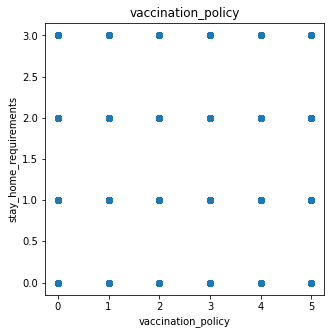

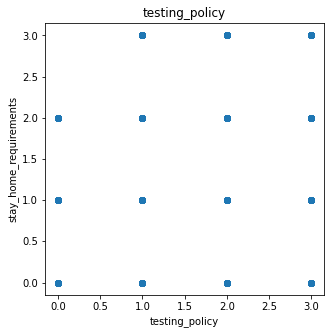

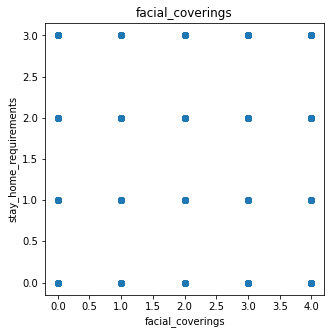

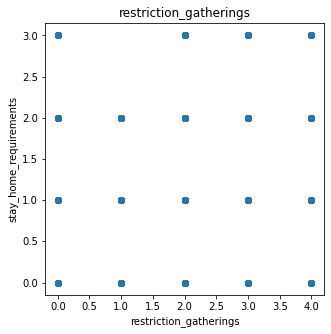

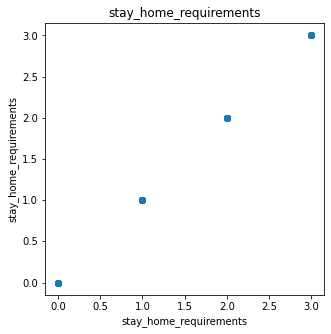

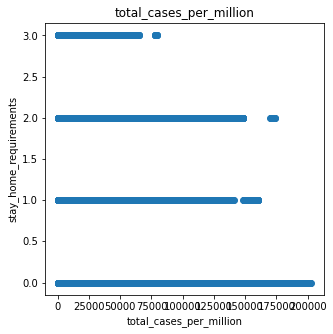

In [134]:
for col in df_scatter.columns:
  plt.figure(figsize=(5,5))
  plt.xlabel(col)
  plt.ylabel("stay_home_requirements")
  plt.title(col)
  plt.scatter(df_task_2[col], df_task_2["stay_home_requirements"])
  plt.show() 

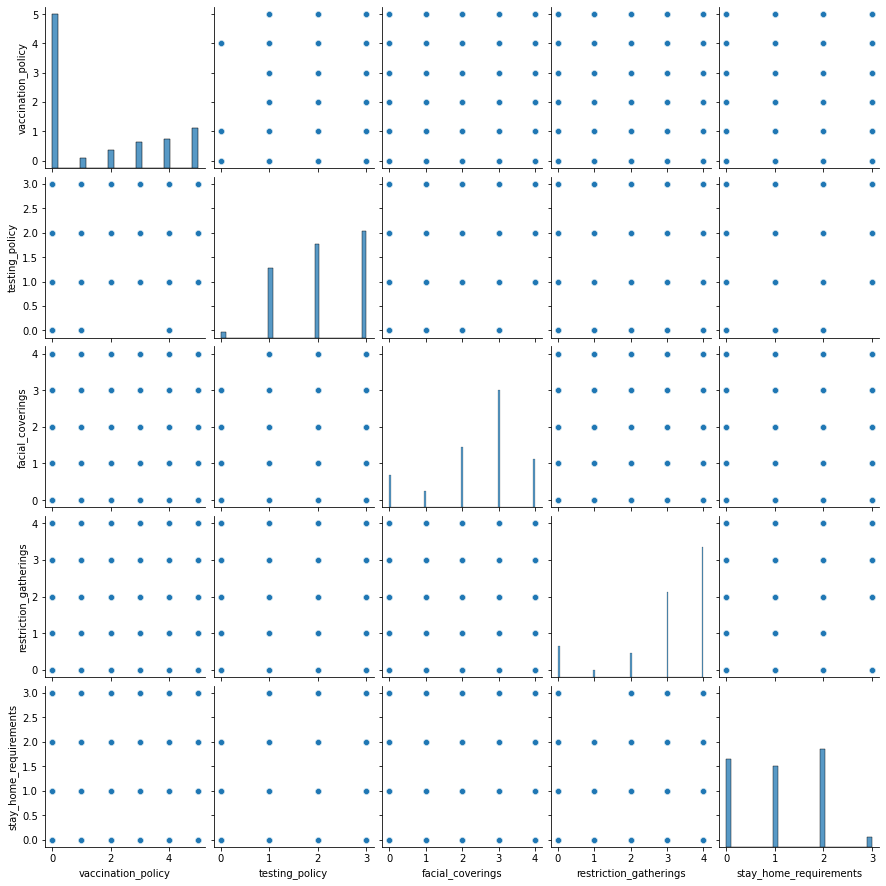

In [135]:
sns.pairplot(data=df_drop_cases)

Predictor Variables (X)

Variable (X) | Description | Grouped By
:------------------ | :------------------|:------------------ | :------------------
testing_policy | Government policies on PCR testing for COVID-19 | No testing policy, Testing only for those who both (a) have symptoms AND (b) meet specific criteria (e.g. key workers, admitted to hospital, came into contact with a known case, returned from overseas), Testing of anyone showing COVID-19 symptoms, Open public testing (e.g “drive through” testing available to asymptomatic people)
vaccination_policy | Policies on the availability of vaccinations | No availability, Availability for ONE of following: key workers/ clinically vulnerable groups/elderly groups, Availability for TWO of following: key workers/clinically vulnerable groups/elderly groups, Availability for ALL of following: key workers/clinically vulnerable groups/elderly groups, Availability for all three plus partial additional availability (select broad groups/ages), Universal availability
facial_coverings | Government policies on the use of face coverings outside-of-the-home | No policy, Recommended, Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible, Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible, Required outside the home at all times regardless of location or presence of other people
restriction_gatherings | Government policies on restrictions on public gatherings | No restrictions, Restrictions on very large gatherings (the limit is above 1000 people), Restrictions on gatherings between 100 to 1000 people,Restrictions on gatherings between 10 to 100 people, Restrictions on gatherings of less than 10 people

Predicted Variable (y)

Variable (y) | Description | Category
:------------------ | :------------------|:------------------ 
stay_home_requirements | Government policies on stay-at-home requirements or household lockdowns | No measures, Recommended not to leave the house, Required to not leave the house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips, Required to not leave the house with minimal exceptions (e.g. allowed to leave only once every few days, or only one person can leave at a time, etc.)

In [136]:
# Extract features and targets
features = ['testing_policy', 'vaccination_policy', 'facial_coverings', 'restriction_gatherings']
target = ['stay_home_requirements']
columns = features + target

df_features, df_target = get_features_targets(df_drop_cases.loc[:, columns].dropna(axis=0), features, target)

display(df_features.describe())
display(df_target.describe())

,testing_policy,vaccination_policy,facial_coverings,restriction_gatherings
count,69721.000000,69721.000000,69721.000000,69721.000000
mean,2.095667,1.595445,2.478034,2.992327
std,0.841156,1.977807,1.196516,1.295547
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,3.000000
50%,2.000000,0.000000,3.000000,3.000000
75%,3.000000,4.000000,3.000000,4.000000
max,3.000000,5.000000,4.000000,4.000000


,stay_home_requirements
count,69721.000000
mean,1.104273
std,0.894363
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


##### 2.4.3.2.2 Multiple Linear Regression

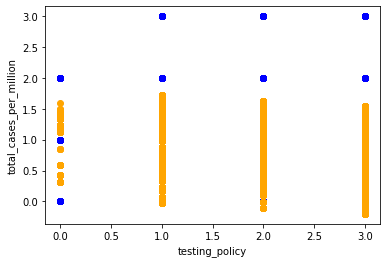

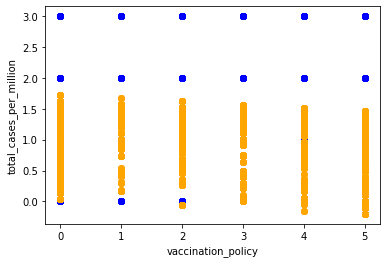

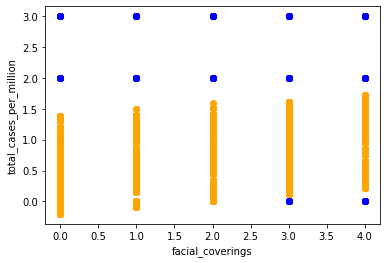

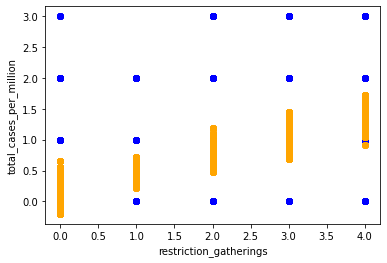

R^2 Score:  0.21225484128249394
Adjusted R^2 Score:  0.21217412803440305
SSᵣ (sum of the square of residuals):  13128.889946231186
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  16666.417814113596
Mean Square Error:  0.6276960196132715
Root Mean Squared Error:  0.7922726927095692
Mean Absolute Error:  0.6664932751158551
[[ 1.10783731]
 [-0.07584741]
 [-0.09877142]
 [ 0.12659339]
 [ 0.34754867]]


In [137]:
# multiple_linear_regression function returns the coefficients of linear regression
beta = multiple_linear_regression(df_features, df_target)
print(beta)

Metric | Before removing | After removing | Increase/Decrease
:------------------ | :------------------|:------------------ | :------------------
R<sup>2</sup> Score | 0.3948836899623418 | 0.21250467850219978 | Decrease
Adjusted R<sup>2</sup> Score | 0.3948305614268238 | 0.21244819483260446 | Decrease
SSᵣ | 13673938089285.852 | 13109.480328904656 | Decrease
SSₜ | 22597206293175.08 | 16647.05804724108 | Decrease
Mean Square Error | 666923771.6083428 | 0.6268279778571606 | Decrease
Root Mean Square Error | 25824.867310566045 | 0.7917246856434127 | Decrease
Mean Absolute Error | 16872.56397313734 | 0.6658660407148005 | Decrease

We observe that we managed to obtain different beta coefficient values from the Multiple Linear Regression model above. These beta values can also be an indicator of the weightage of a particular $X$ variable, with a higher beta coefficient value indicating a more important variable for the model. 

Further Analysis: 
We made our hypothesis by looking at whether changes in one policy will affect the stay home requirement policies. We did this by seeing the effect of one policy on the general public and then using this result to see whether stay home requirement policies could be slacken or stricter. However this may not be the case in real life. 

For example, governments may still impose strict stay home requirement policies despite the ability for it to be slackened so that they can more effectively curb the spread of the virus. So instead of slacking the stay home requirement policies, as what we would had expected, it ended up remaining as strict or possibly more. 

By not having this thought process when coming up with our hypothesis, our expected relationships between the other policies and the stay home requirement policies may not actually be applied to the real world. Hence, out correlation values would potentially be lower, signalling a weaker relationship between the other policies and the stay home requirement policies.

#### 2.4.3.3 Improvement 3: k-fold Cross Validation
Evaluating our model performance above, we noted that our scores are rather low for most metrics, possibly meaning a good performance.

Validation is very important to machine learning as there is a need to validate the stability of the learning model and how well it will adapt to new data or in a practical scenario [1]. Cross-validation allows us to be sure that the model is actually picking up patterns from the data and not the inherent noise from the data, ensuring the quality of the model [1].

The goal of cross-validation is to define a dataset to test the model in the training phase (i.e. a validation dataset) in order to limit problems like overfitting and underfitting, and to get an insight on how the model will generalize to an independent dataset [1]. It is important that the
validation and the training set should be drawn from the same distribution. Otherwise, it would make things worse [1].

In typical validation methods, the dataset will be split into 2 sets, a training set and a test set. These 2 sets of data do not overlap and contain different data. The training set will be used to train the model and test set will be used to test the model and determine the accuracy of the model. However, if the split made is not random (e.g. if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age), overfitting will occur. This is due to the fact that it is not certain which data points will end up in the validation set and the result might be entirely different for different sets [1].

Overfitting usually occurs when the model learns the parameters of a prediction function and tests it on the same data. A model that repeats the labels of the samples which it has just seen would have a perfect score, but would fail to
predict anything useful on yet-unseen data. 

In our case, to tackle overfitting, we have employed the use of k-fold cross validation. It does this by first splitting the data into k groups. The algorithm is then trained and evaluated k times and the performance summarized by taking the mean performance score. Each group of data is called a fold, hence the name k-fold cross-validation.

It works by first training the algorithm on the k-1 groups of the data and evaluating it on the kth hold-out group as the test set. This is repeated so that each of the k groups is given an opportunity to be held out and used as the test set. As such, the value of k should be divisible by the number of rows in your training dataset, to ensure each of the k groups has the same number of rows. A visualisation of k-fold Cross Validation is seen below.
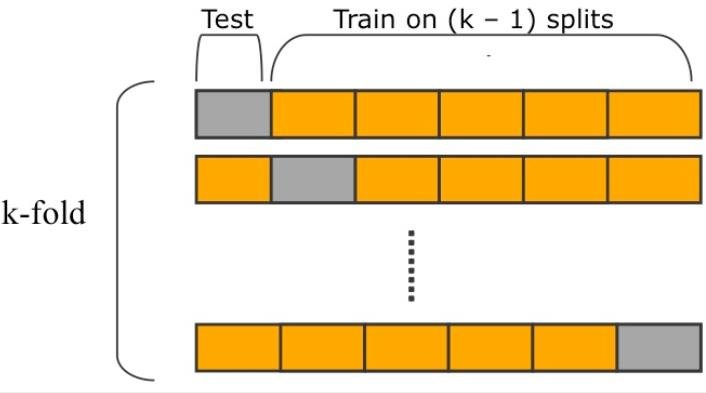

Sources:
1. G. Drakos, “Cross-Validation,” Towards Data Science, 16-Aug-2018. [Online]. Available:
https://towardsdatascience.com/cross-validation-70289113a072.

In [138]:
def multiple_linear_regression(df_features_train, df_target_train, df_features_test, df_target_test):
  # Normalize the features using z normalization
  df_features_train_z = normalize_z(df_features_train)

  # Change the features and the target to numpy array using the prepare functions
  X = prepare_feature(df_features_train_z)
  target = prepare_target(df_target_train)

  iterations = 1500
  alpha = 0.1
  beta = np.zeros((X.shape[1], 1), dtype=float)

  # Call the gradient_descent function
  beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
  
  # call the predict() method
  pred = predict(df_features_test, beta)

  # Plotting figures for visualisation
  plt.figure()
  plt.title("J_storage")
  plt.plot(J_storage)
  for column in df_features_test.columns:
    plt.figure()
    plt.xlabel(column)
    plt.ylabel("stay_home_requirements")
    plt.scatter(df_features_test[column], np.array(df_target_test), color='blue')
    plt.scatter(df_features_test[column], pred, color='orange')
    plt.show()

  # Change target test set to a numpy array
  target = df_target_test.to_numpy()

  # Calculate R^2, Adjusted R^2, SS, MSE, RMSE, MAE, MSLE, RMSLE
  print("R^2 Score: ", r2_score(target, pred))
  print("Adjusted R^2 Score: ", adjusted_r2_score(r2_score(target, pred), X.shape[0], X.shape[1]))
  print("SSᵣ (sum of the square of residuals): ", ss_score(target, pred)[0])
  print("SSₜ (total sum of errors if we take the mean of the observed values as the predicted value): ", ss_score(target, pred)[1])
  print("Mean Square Error: ", mean_squared_error(target, pred))
  print("Root Mean Squared Error: ", root_mean_squared_error(target, pred))
  print("Mean Absolute Error: ", mean_absolute_error(target, pred))

  return beta, r2_score(target, pred), adjusted_r2_score(r2_score(target, pred), X.shape[0], X.shape[1]), ss_score(target, pred)[0], ss_score(target, pred)[1], mean_squared_error(target, pred), root_mean_squared_error(target, pred), mean_absolute_error(target, pred)

In [139]:
# Extract features and targets
features = ['testing_policy', 'vaccination_policy','facial_coverings', 'restriction_gatherings', 'stay_home_requirements']
target = ['total_cases_per_million']
columns = features + target

df_features, df_target = get_features_targets(df_task_2.loc[:, columns].dropna(axis=0), features, target)

display(df_features.describe())
display(df_target.describe())

,testing_policy,vaccination_policy,facial_coverings,restriction_gatherings,stay_home_requirements
count,68345.000000,68345.000000,68345.000000,68345.000000,68345.000000
mean,2.091053,1.572975,2.497856,3.015978,1.116951
std,0.834485,1.976444,1.194038,1.279919,0.893945
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,3.000000,0.000000
50%,2.000000,0.000000,3.000000,3.000000,1.000000
75%,3.000000,3.000000,3.000000,4.000000,2.000000
max,3.000000,5.000000,4.000000,4.000000,3.000000


,total_cases_per_million
count,68345.000000
mean,21353.319636
std,33236.145521
min,0.001000
25%,477.067000
50%,4499.892000
75%,28553.248000
max,203027.639000


k-fold Cross Validation Iteration  1


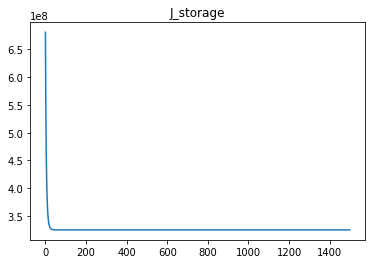

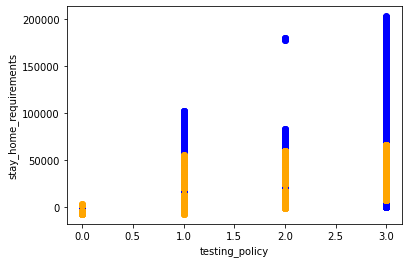

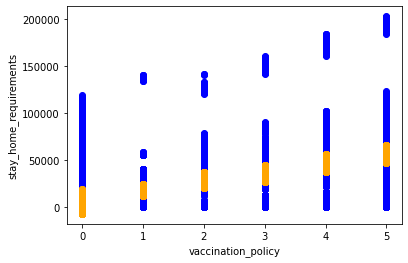

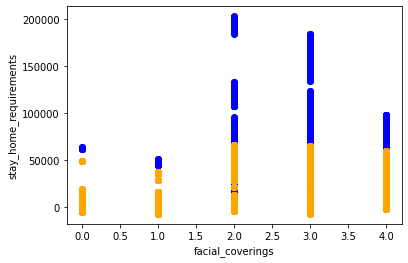

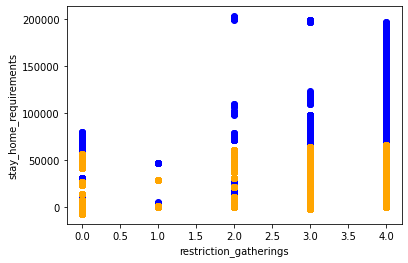

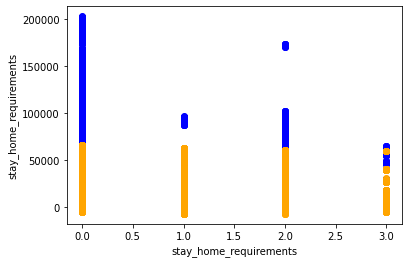

R^2 Score:  0.320143266020502
Adjusted R^2 Score:  0.3200686507832765
SSᵣ (sum of the square of residuals):  10671221170172.127
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  15696279284767.564
Mean Square Error:  780687773.075728
Root Mean Squared Error:  27940.790487667455
Mean Absolute Error:  17139.33117546973


k-fold Cross Validation Iteration  2


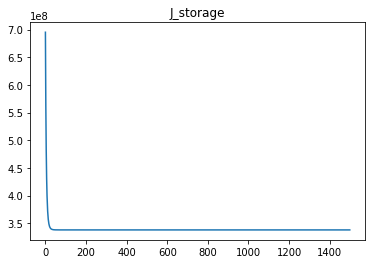

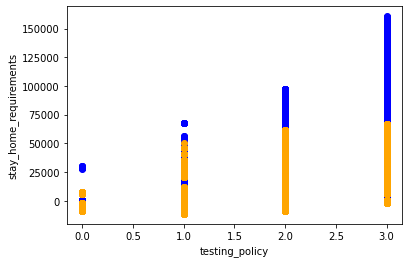

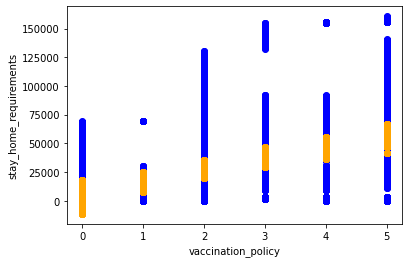

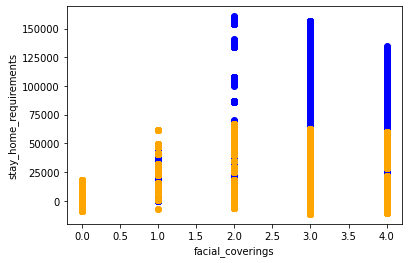

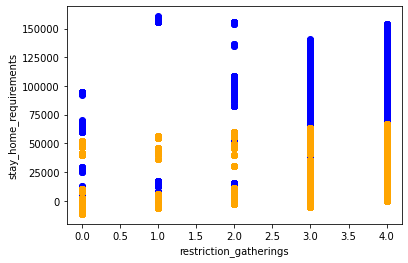

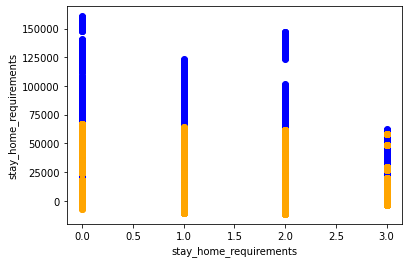

R^2 Score:  0.3544163125790536
Adjusted R^2 Score:  0.35434545885711755
SSᵣ (sum of the square of residuals):  9321924148280.234
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  14439528646581.13
Mean Square Error:  681975575.995335
Root Mean Squared Error:  26114.662088476944
Mean Absolute Error:  17322.5282924584


k-fold Cross Validation Iteration  3


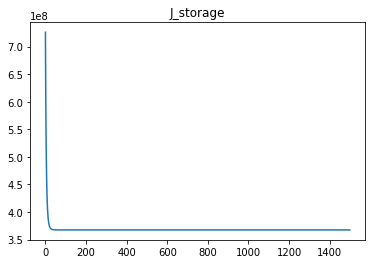

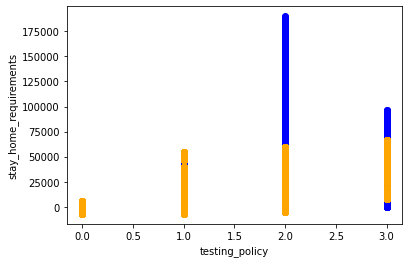

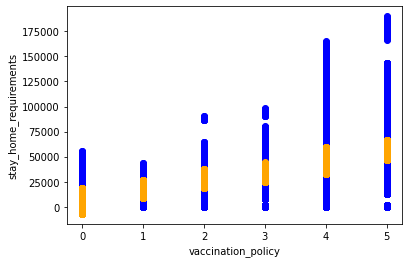

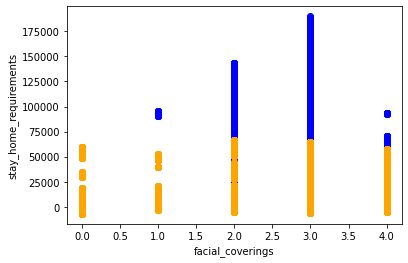

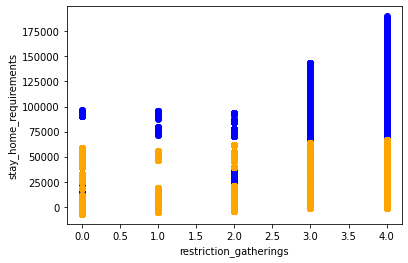

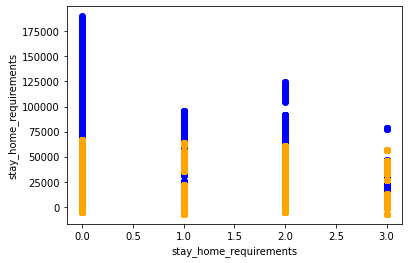

R^2 Score:  0.46300380077414405
Adjusted R^2 Score:  0.46294486468247686
SSᵣ (sum of the square of residuals):  6053422763674.506
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  11272747874940.71
Mean Square Error:  442857763.08980215
Root Mean Squared Error:  21044.185968808633
Mean Absolute Error:  14029.025187051428


k-fold Cross Validation Iteration  4


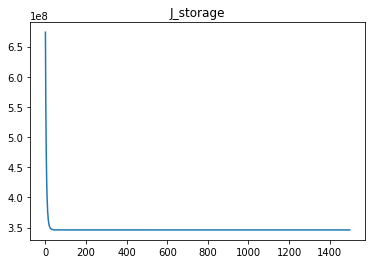

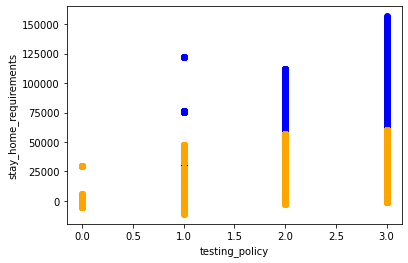

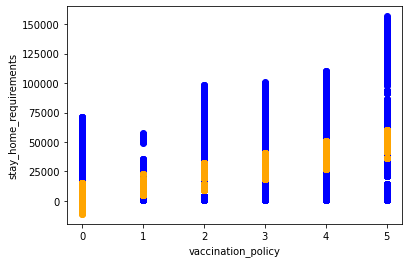

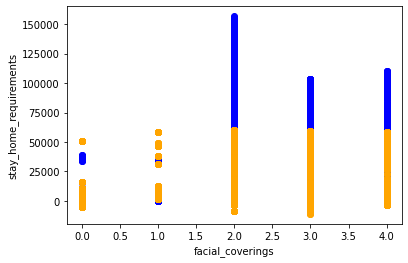

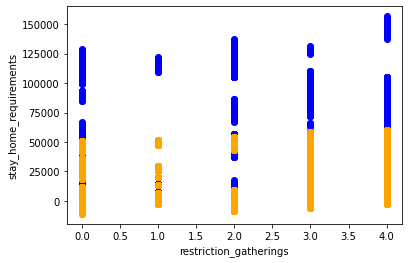

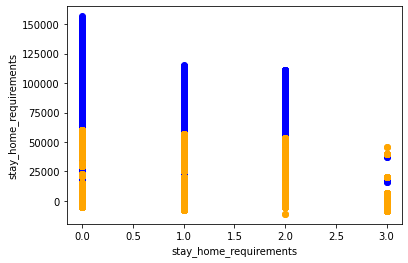

R^2 Score:  0.43770499656523265
Adjusted R^2 Score:  0.43764328389405505
SSᵣ (sum of the square of residuals):  8522493472372.525
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  15156623160997.432
Mean Square Error:  623490633.7239392
Root Mean Squared Error:  24969.794426945915
Mean Absolute Error:  17018.342410433208


k-fold Cross Validation Iteration  5


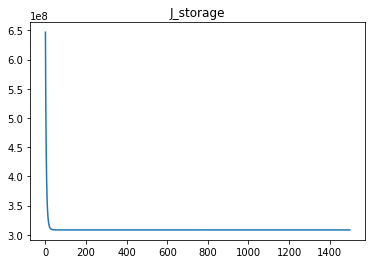

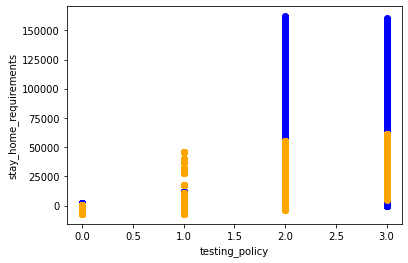

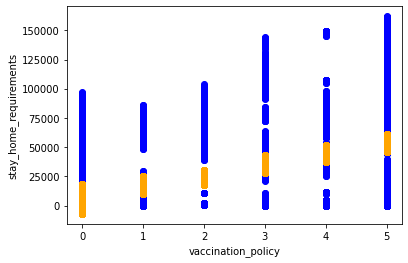

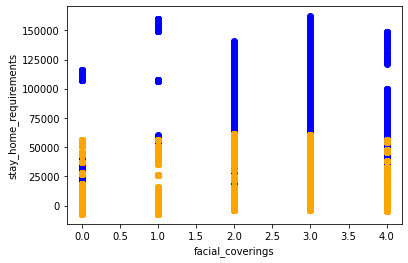

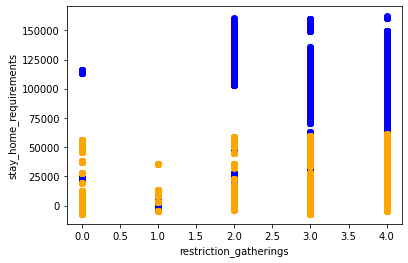

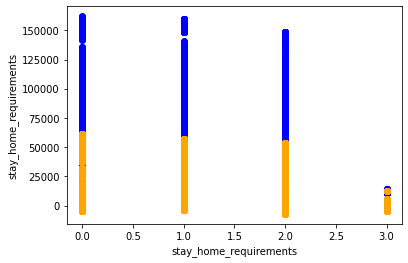

R^2 Score:  0.3229128830228072
Adjusted R^2 Score:  0.32283857175496133
SSᵣ (sum of the square of residuals):  12678378875019.203
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  18724885701002.438
Mean Square Error:  927527900.7256714
Root Mean Squared Error:  30455.342728750755
Mean Absolute Error:  20342.106278538402


Average R^2 Score:  0.3796362517923479
Average Adjusted R^2 Score:  0.3795681659943775
Average SSᵣ:  9449488085903.719
Average SSₜ:  15058012933657.855
Average Mean Square Error:  691307929.3220952
Average Root Mean Squared Error:  26104.955140129936
Average Mean Absolute Error:  17170.26666879023


In [140]:
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, random_state=None)
i = 1

r2s = []
adjusted_r2s = []
ssrs = []
ssts = []
mses = []
rmses = []
maes = []
msles = []
rmsles = []

for train_index, test_index in kf.split(df_features):
  df_features_train = df_features.iloc[train_index, :]
  df_features_test = df_features.iloc[test_index, :]
  df_target_train = df_target.iloc[train_index, :]
  df_target_test = df_target.iloc[test_index, :]
  print("k-fold Cross Validation Iteration ", i)
  i += 1
  beta, r2, adjusted_r2, ssr, sst, mse, rmse, mae = multiple_linear_regression(df_features_train, df_target_train, df_features_test, df_target_test)
  print("\n")

  r2s.append(r2)
  adjusted_r2s.append(adjusted_r2)
  ssrs.append(ssr)
  ssts.append(sst)
  mses.append(mse)
  rmses.append(rmse)
  maes.append(mae)

print("Average R^2 Score: ", sum(r2s) / len(r2s))
print("Average Adjusted R^2 Score: ", sum(adjusted_r2s) / len(adjusted_r2s))
print("Average SSᵣ: ", sum(ssrs) / len(ssrs))
print("Average SSₜ: ", sum(ssts) / len(ssts))
print("Average Mean Square Error: ", sum(mses) / len(mses))
print("Average Root Mean Squared Error: ", sum(rmses) / len(rmses))
print("Average Mean Absolute Error: ", sum(maes) / len(maes))

Metric | Without k-fold CV | With k-fold CV (Average) | Increase/Decrease
:------------------ | :------------------|:------------------ | :------------------
R<sup>2</sup> Score | 0.3948836899623418 | 0.3796362517923315 | Decrease
Adjusted R<sup>2</sup> Score | 0.3948305614268238 | 0.3795681659943611 | Decrease
SSᵣ | 13673938089285.852 | 9449488085903.975 | Decrease
SSₜ | 22597206293175.08 | 15058012933657.855 | Decrease
Mean Square Error | 666923771.6083428 | 691307929.322114 | Increase
Root Mean Square Error | 25824.867310566045 | 26104.955140130292 | Increase
Mean Absolute Error | 16872.56397313734 | 17170.266668790442 | Increase

From this, we see that the values which were expected to increase actually decreased, while the values which were expected to decrease actually increased. However, it is key to take note that this was from an average of 5 folds from k-fold Cross Validation. 


## 2.5 Discussion and Analysis

### 2.5.1 From Improvement 1
By running the model on selected countries and having a different regression model per country, we see that the adjusted R<sup>2</sup> value for most countries was around 0.8 to 0.9. The RMSE value had also gone down. This goes to show that predicting total cases could have been different based on the country, and that each country has unique features and the trend for total cases may not be universal. 

### 2.5.2 From Improvement 2

Metric | Before removing | After removing | Increase/Decrease
:------------------ | :------------------|:------------------ | :------------------
R<sup>2</sup> Score | 0.3948836899623418 | 0.21250467850219978 | Decrease
Adjusted R<sup>2</sup> Score | 0.3948305614268238 | 0.21244819483260446 | Decrease
SSᵣ | 13673938089285.852 | 13109.480328904656 | Decrease
SSₜ | 22597206293175.08 | 16647.05804724108 | Decrease
Mean Square Error | 666923771.6083428 | 0.6268279778571606 | Decrease
Root Mean Square Error | 25824.867310566045 | 0.7917246856434127 | Decrease
Mean Absolute Error | 16872.56397313734 | 0.6658660407148005 | Decrease

We observe that we managed to obtain different beta coefficient values from the Multiple Linear Regression model above. These beta values can also be an indicator of the weightage of a particular $X$ variable, with a higher beta coefficient value indicating a more important variable for the model. 

Further Analysis: 
We made our hypothesis by looking at whether changes in one policy will affect the stay home requirement policies. We did this by seeing the effect of one policy on the general public and then using this result to see whether stay home requirement policies could be slacken or stricter. However this may not be the case in real life. 

For example, governments may still impose strict stay home requirement policies despite the ability for it to be slackened so that they can more effectively curb the spread of the virus. So instead of slacking the stay home requirement policies, as what we would had expected, it ended up remaining as strict or possibly more. 

By not having this thought process when coming up with our hypothesis, our expected relationships between the other policies and the stay home requirement policies may not actually be applied to the real world. Hence, out correlation values would potentially be lower, signalling a weaker relationship between the other policies and the stay home requirement policies.

### 2.5.3 From Improvement 3

Metric | Without k-fold CV | With k-fold CV (Average) | Increase/Decrease
:------------------ | :------------------|:------------------ | :------------------
R<sup>2</sup> Score | 0.3948836899623418 | 0.3796362517923315 | Decrease
Adjusted R<sup>2</sup> Score | 0.3948305614268238 | 0.3795681659943611 | Decrease
SSᵣ | 13673938089285.852 | 9449488085903.975 | Decrease
SSₜ | 22597206293175.08 | 15058012933657.855 | Decrease
Mean Square Error | 666923771.6083428 | 691307929.322114 | Increase
Root Mean Square Error | 25824.867310566045 | 26104.955140130292 | Increase
Mean Absolute Error | 16872.56397313734 | 17170.266668790442 | Increase

From this, we see that the values which were expected to increase actually decreased, while the values which were expected to decrease actually increased. However, it is key to take note that this was from an average of 5 folds from k-fold Cross Validation. 


### 2.5.4 Conclusion

All in all, we note that the aforementioned policies did not really affect the total cases per million in the way we expected on a universal level. However, analysing on a country-by-country basis, we see that the cases were affected in the way we expected on a universal level.

Based on our various improvements stated above, we see that governmental policies may be related to each other in some ways, but there could have been other stronger factors affecting COVID-19, such as the variant of COVID-19 or the particular point in time.